## TP3: Introducción al aprendizaje automático

In [1]:
import pandas as pd
import numpy as np

In [2]:
Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/datos_diarios_cordoba.csv", parse_dates = True, index_col="fecha")
id_Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/metadatos_estaciones.csv")

In [3]:
id_Datos

,id,omm_id,nombre,lon_grad,lon_min,lon_seg,lon_hem,lat_grad,lat_min,lat_seg,...,lon_dec,lat_dec,elev,institucion_id,nivel_adm1,nivel_adm2,fecha_inicio,tipo,pais_id,siglas
0,1,87244,Villa Maria del Rio Seco,63,43,39.31,W,29,54,20.90,...,-63.727586,-29.905806,341,1,Cordoba,Rio Seco,1/10/1903,C,AR,SMN
1,2,87328,Villa Dolores Aero,65,8,56.54,W,31,57,4.66,...,-65.149040,-31.951295,569,1,Cordoba,San Javier,1/10/1903,C,AR,SMN
2,3,87344,Cordoba Aero,64,12,42.67,W,31,17,47.87,...,-64.211853,-31.296630,474,1,Cordoba,Colon,1/1/1946,C,AR,SMN
3,4,87345,Cordoba Obs.,64,11,53.79,W,31,25,14.73,...,-64.198276,-31.420759,426,1,Cordoba,Capital,1/1/1961,C,AR,SMN
4,5,87349,Pilar Obs.,63,52,55.19,W,31,40,5.11,...,-63.881997,-31.668086,338,1,Cordoba,Rio Segundo,1/1/1907,C,AR,SMN
5,6,87466,Marcos Juarez INTA,62,7,0.00,W,32,41,0.00,...,-62.120000,-32.680000,110,2,Cordoba,Marcos Juarez,10/1/1967,C,AR,INTA
6,7,87453,Rio Cuarto Aero,64,16,37.10,W,33,5,43.80,...,-64.276973,-33.095500,421,1,Cordoba,Rio Cuarto,1/1/1875,C,AR,SMN
7,8,87467,Marcos Juarez Aero,62,9,1.85,W,32,40,46.91,...,-62.150513,-32.679697,114,1,Cordoba,Marcos Juarez,1/1/1947,C,AR,SMN
8,9,87534,Laboulaye Aero,63,22,3.48,W,34,7,40.24,...,-63.367634,-34.127844,137,1,Cordoba,Presidente Roque Saenz PeNaN,1/7/1913,C,AR,SMN
9,10,9987009,Manfredi INTA,63,46,0.00,W,31,49,0.00,...,-63.770000,-31.820000,292,2,Cordoba,Rio Segundo,9/1/1969,C,AR,INTA


De los datasets analizados en los TPs anteriores, ahora nos vamos a enfocar en:

- La Florida
- Marcos Juarez

Y vamos a usar como variable que queremos predecir, la PMDA que han calculado para cada año hidrológico (del 1/julio al 30/junio).

Las demás variables (como viento, temperatura, etc) las vamos a resumir para cada año hidrológico en la media (se pueden agregar más estadísticos pero así es suficiente).

##### Actividades:

##### OBJETIVO: Predecir Precipitación Máxima Diaria Anual (PMDA) para los próximos 5 años

**1**) De los dataset que han trabajado hasta ahora, agreguen más features al DataFrame **"Datos"** (Por lo general, más features tienden a dar mejores predicciones).

2) Además de las features del punto anterior, les propongo agregar nuevas features moviendo las originales tantos "pasos de tiempo" como features nuevas quieran generar.

3) Curar el dataset (si fuera necesario).

4) Aplicar técnicas de selección y extraccion de features. Armar un nuevo dataset con aquellas features más significativas.

5) Dividir el dataset (training, validation, test).. Recuerden que queremos predecir la PMDA para los próximos 5 años.

6) Analizar y elegir 3 modelos para REGRESIÓN. Entrenarlos y analizar resultados.

7) Evaluar predicciones de los diferentes modelos.

8) ¿Qué estadísticos utilizaron para evaluar las regresiones? Justifiquen su elección.

In [4]:
full_dataset = pd.read_csv('https://raw.githubusercontent.com/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/master/datasetTP2/datos_diarios_cordoba_terra_chirps.csv')


Se cargan los valores de índices climáticos usados en el TP2 que condicionan el clima regional. Se resumen por año hidrológico en distintas métricas: media, máximo y mínimo. Algunos indican sequías con valores positivos y otros negativos.

Se podrían agregar más! Sólo elegí tres a modo de ejemplo.

In [5]:
dataset_indices = pd.read_csv('https://raw.githubusercontent.com/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/master/datasetTP2/indices_climaticos_corregidos.csv')

dataset_indices = dataset_indices[['hydro_year', 'SOI', 'ONI', 'Nino 3+4', 'PDO']]
dataset_indices = dataset_indices.groupby(['hydro_year', ]).agg(
    SOI_mean = ('SOI','mean'),
    SOI_max = ('SOI','max'),
    SOI_min = ('SOI','min'),
    ONI_mean = ('ONI','mean'),
    ONI_max = ('ONI','max'),
    ONI_min = ('ONI','min'),
    Nino_3_4_mean = ('Nino 3+4','mean'),
    Nino_3_4_max = ('Nino 3+4','max'),
    Nino_3_4_min = ('Nino 3+4','min'),
    PDO_mean = ('PDO','mean'),
    PDO_max = ('PDO','max'),
    PDO_min = ('PDO','min')


)                                                          
                                                                 

dataset_indices.head()


,SOI_mean,SOI_max,SOI_min,ONI_mean,ONI_max,ONI_min,Nino_3_4_mean,Nino_3_4_max,Nino_3_4_min,PDO_mean,PDO_max,PDO_min
hydro_year,,,,,,,,,,,,
1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.488000,-0.03,-1.33
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.355000,0.08,-3.60
1949,NaN,NaN,NaN,-1.256000,-1.07,-1.53,25.588000,26.28,24.55,-1.344167,-0.56,-2.91
1950,0.440000,2.5,-1.1,-0.419167,0.36,-0.85,26.180833,27.92,25.24,-1.435833,-0.25,-2.93
1951,-0.708333,1.2,-1.8,0.657500,1.15,0.20,27.259167,27.80,26.67,-0.772500,0.70,-2.01


In [6]:
import datetime as dt

dataset_indices_ond = pd.read_csv('https://raw.githubusercontent.com/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/master/datasetTP2/indices_climaticos_corregidos.csv', parse_dates = True)

dataset_indices_ond.loc[:, 'date'] = pd.to_datetime(dataset_indices_ond.fix_date)
dataset_indices_ond.loc[:,'mes'] = dataset_indices_ond.loc[:,'date'].dt.month


mes = [10, 11, 12]
dataset_indices_ond = dataset_indices_ond[dataset_indices_ond.mes.isin(mes)]

dataset_indices_ond = dataset_indices_ond[['hydro_year', 'SOI', 'ONI', 'Nino 3+4', 'PDO']]
dataset_indices_ond = dataset_indices_ond.groupby(['hydro_year', ]).agg(
    SOI_OND_mean = ('SOI','mean'),
    SOI_OND_max = ('SOI','max'),
    SOI_OND_min = ('SOI','min'),
    ONI_OND_mean = ('ONI','mean'),
    ONI_OND_max = ('ONI','max'),
    ONI_OND_min = ('ONI','min'),
    Nino_3_4_OND_mean = ('Nino 3+4','mean'),
    Nino_3_4_OND_max = ('Nino 3+4','max'),
    Nino_3_4_OND_min = ('Nino 3+4','min'),
    PDO_OND_mean = ('PDO','mean'),
    PDO_OND_max = ('PDO','max'),
    PDO_OND_min = ('PDO','min')


)       


dataset_indices_ond.head()

,SOI_OND_mean,SOI_OND_max,SOI_OND_min,ONI_OND_mean,ONI_OND_max,ONI_OND_min,Nino_3_4_OND_mean,Nino_3_4_OND_max,Nino_3_4_OND_min,PDO_OND_mean,PDO_OND_max,PDO_OND_min
hydro_year,,,,,,,,,,,,
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.303333,-0.89,-1.70
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.013333,-0.80,-1.41
1950,NaN,NaN,NaN,-0.613333,-0.44,-0.80,25.483333,25.69,25.29,-1.526667,-0.76,-2.46
1951,-1.366667,-1.2,-1.6,1.000000,1.15,0.81,27.120000,27.25,26.91,-0.760000,-0.28,-1.68
1952,-0.466667,0.6,-2.0,0.096667,0.15,0.04,26.130000,26.26,25.92,-0.356667,0.04,-0.76


Armé un dataset en función de si es un año Niño (más lluvias) o Nina (menos lluvias) o neutro. 

In [7]:
dataset_tipo_ano = pd.read_csv('https://raw.githubusercontent.com/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/master/Dataset%20TP3/tipo_ano.csv', sep = ';')


dataset_tipo_ano.head()


,hydro_year,type_category
0,1960,Neutral
1,1961,Neutral
2,1962,Neutral
3,1963,Warm
4,1964,Cold


In [8]:
full_dataset.nombre.unique()

array(['Pilar Obs.', 'Rio Cuarto Aero', 'Marcos Juarez INTA',
       'La Florida'], dtype=object)

Se filtran las estaciones de La Florida y marcos Juarez

In [9]:
dataset = full_dataset[(full_dataset['nombre'] == 'La Florida') | (full_dataset['nombre'] == 'Marcos Juarez INTA')]
dataset.loc[:, 'fecha'] = pd.to_datetime(dataset['fecha'])
dataset.reset_index(inplace=True)
dataset = dataset.drop(['Unnamed: 0'], axis=1)

/Users/alessiobocco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [10]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [11]:
def get_hydro_year(date_, start_month=7):
    year = date_.strftime('%Y')
    month = date_.strftime('%m')
    offset = 1 if int(month) >= start_month - 1 else 0
    hydro_year = int(year) + offset - 1
    return hydro_year

def add_hydro_year(dataset):
    dataset = dataset.copy()
    dataset.reset_index(inplace=True)
    dataset['hydro_year'] = dataset['fecha'].apply(get_hydro_year)
    return dataset

def remove_cols(dataset, cols=['level_0', 'ano', 'mes', 'caudal', 'tmed', 'vmax_d', 'vmax_f']):
    return dataset.drop(cols, axis=1)

def get_grouped_dataset(dataset, group=['omm_id', 'hydro_year']):
    return dataset.groupby(group)

def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature].iloc[i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements
    
def number_days_over_threshold(dataset, threshold = 10):
    rainfall_data = dataset.copy()
    rainfall_data = rainfall_data[['omm_id', 'hydro_year', 'prcp']]
    rainfall_data['day_beyond_threshold'] = rainfall_data.prcp > threshold
    rainfall_data = rainfall_data.groupby(['omm_id', 'hydro_year'], as_index=False).day_beyond_threshold.sum()
    return(rainfall_data)

def rainy_days_over_percentile(dataset, threshold = 0.9):
    rainfall_data = dataset.copy()
    rainfall_data = rainfall_data[['omm_id', 'hydro_year', 'prcp']]
    rainfall_data = rainfall_data[rainfall_data.prcp > 0.1]
    reference_quantiles = rainfall_data.groupby(['omm_id'], as_index=False).prcp.quantile(threshold)
    reference_quantiles.rename(columns={'prcp': 'prcp_threshold'}, inplace=True) 
    rainfall_data = pd.merge(rainfall_data, reference_quantiles, on = 'omm_id')
    rainfall_data['day_beyond_threshold'] = rainfall_data.prcp > rainfall_data.prcp_threshold    
    rainfall_data = rainfall_data.groupby(['omm_id', 'hydro_year'], as_index=False).day_beyond_threshold.sum()
    return(rainfall_data)

def add_days_over_threshold(dataset_yearly, dataset, threshold):
    dataset_ = number_days_over_threshold(dataset, threshold)
    dataset_ = dataset_.rename(columns = {'day_beyond_threshold': f'day_{threshold}_mm'})
    return pd.merge(dataset_yearly, dataset_, on = ['hydro_year', 'omm_id'])

def add_days_over_percentile(dataset_yearly, dataset, threshold):
    dataset_ = rainy_days_over_percentile(dataset, threshold)
    dataset_ = dataset_.rename(columns = {'day_beyond_threshold': f'day_{int(100 * threshold)}'})
    return pd.merge(dataset_yearly, dataset_, on = ['hydro_year', 'omm_id'])

def add_lagged_features(dataset_, columns, N):
    dataset = dataset_.copy()
    for feature in columns:
        #if feature != 'PMDA':
         #   for n in range(1, N):
        derive_nth_day_feature(dataset, feature, N)
    return dataset

Se agrega el año hidrológico.

In [12]:
dataset = add_hydro_year(dataset)

In [13]:
dataset.head()

,level_0,index,fecha,ano,mes,omm_id,nombre,prcp,tmax,tmin,tmed,vmax_d,vmax_f,vmed,caudal,ETreal_mm,HumedadSuelo_mm,RadSolar_Wpm2,PresionVapor_hPa,IndicePalmer_porc,hydro_year
0,0,43473,1967-10-01,1967,10,87466,Marcos Juarez INTA,0.0,25.8,11.7,NaN,NaN,NaN,3.333333,NaN,NaN,NaN,NaN,NaN,NaN,1967
1,1,43474,1967-10-02,1967,10,87466,Marcos Juarez INTA,7.5,25.0,14.4,NaN,NaN,NaN,4.444444,NaN,NaN,NaN,NaN,NaN,NaN,1967
2,2,43475,1967-10-03,1967,10,87466,Marcos Juarez INTA,21.0,23.4,13.2,NaN,NaN,NaN,6.666667,NaN,NaN,NaN,NaN,NaN,NaN,1967
3,3,43476,1967-10-04,1967,10,87466,Marcos Juarez INTA,0.0,21.2,14.0,NaN,NaN,NaN,1.944444,NaN,NaN,NaN,NaN,NaN,NaN,1967
4,4,43477,1967-10-05,1967,10,87466,Marcos Juarez INTA,0.0,22.5,11.0,NaN,NaN,NaN,5.833333,NaN,NaN,NaN,NaN,NaN,NaN,1967


Las variables diarias se agregan por año hidrológico. En lugar de sólo calular la media o máxima, generé más features como los valores mínimos, desvíos. También estandaricé y normalicé algunas de las variables. Usé una ventana movil de 5 años porque el profe quería un pronóstico a cinco años, entonces generé variables que ponderan los valores en ventanas de 5 años. 

In [14]:
dataset = dataset[dataset.hydro_year >= 1961]
dataset_yearly = dataset.groupby(['hydro_year', 'omm_id', 'nombre']).agg(
                                                                         PMDA = ('prcp', max), 
                                                                         prcp = ('prcp', sum),
                                                                         prcp_sd = ('prcp', 'std'),
                                                                         prcp_mad = ('prcp', 'mad'), 
                                                                         tmax_max = ('tmax', max),
                                                                         tmax_mean = ('tmax', 'mean'),
                                                                         tmax_sd = ('tmax', 'std'),
                                                                         tmax_min = ('tmax', min),
                                                                         tmin_max = ('tmin', max),
                                                                         tmin_mean = ('tmin', 'mean'),
                                                                         tmin_min = ('tmin', min),
                                                                         tmin_sd = ('tmin', 'std'),
                                                                         vmed_max = ('vmed', max),
                                                                         vmed_mean = ('vmed', 'mean'),
                                                                         vmed_min = ('vmed', min),
                                                                         vmed_sd = ('vmed', 'std')
                                                                         #caudal_max = ('caudal', max),
                                                                         #caudal_mean = ('caudal', 'mean'),
                                                                         #caudal_min = ('caudal', min)
                                                                         )
# Variables derivadas de la precipitacion
dataset_yearly['PMDA_log'] = dataset_yearly.PMDA.transform(np.log)
dataset_yearly['prcp_log'] = dataset_yearly.prcp.transform(np.log)
dataset_yearly['prcp_standardized'] = (dataset_yearly['prcp'] - dataset_yearly['prcp'].mean()) / dataset_yearly['prcp'].std()
dataset_yearly['prcp_normalized'] = (dataset_yearly['prcp'] - dataset_yearly['prcp'].min()) / (dataset_yearly['prcp'].max() - dataset_yearly['prcp'].min())
#dataset_yearly['prcp_standardized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['prcp_standardized'].mean().droplevel(level=[0,1])
#dataset_yearly['prcp_normalized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['prcp_normalized'].mean().droplevel(level=[0,1])
#dataset_yearly['prcp_log_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['prcp_log'].mean().droplevel(level=[0,1])
#dataset_yearly['PMDA_log_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['PMDA_log'].mean().droplevel(level=[0,1])
#dataset_yearly['PMDA_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['PMDA'].mean().droplevel(level=[0,1])
#dataset_yearly['prcp_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['prcp'].mean().droplevel(level=[0,1])

# Variables derivadas de la temperatura media
dataset_yearly['tmed_max'] = (dataset_yearly.tmax_max + dataset_yearly.tmin_max)/2
dataset_yearly['tmed_mean'] = (dataset_yearly.tmax_mean + dataset_yearly.tmin_mean)/2
dataset_yearly['tmed_min'] = (dataset_yearly.tmax_min + dataset_yearly.tmin_min)/2
dataset_yearly['tmed_range'] = dataset_yearly.tmed_max - dataset_yearly.tmed_min
dataset_yearly['tmed_standardized'] = (dataset_yearly['tmed_mean'] - dataset_yearly['tmed_mean'].mean()) / dataset_yearly['tmed_mean'].std()
dataset_yearly['tmed_normalized'] = (dataset_yearly['tmed_mean'] - dataset_yearly['tmed_mean'].min()) / (dataset_yearly['tmed_mean'].max() - dataset_yearly['tmed_mean'].min())

# Variables derivadas de la temperatura maxima
dataset_yearly['tmax_range'] = dataset_yearly.tmax_max - dataset_yearly.tmax_min
dataset_yearly['tmax_standardized'] = (dataset_yearly['tmax_mean'] - dataset_yearly['tmax_mean'].mean()) / dataset_yearly['tmax_mean'].std()
dataset_yearly['tmax_normalized'] = (dataset_yearly['tmax_mean'] - dataset_yearly['tmax_mean'].min()) / (dataset_yearly['tmax_mean'].max() - dataset_yearly['tmax_mean'].min())
#dataset_yearly['tmax_standardized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])
#dataset_yearly['tmax_normalized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])
#dataset_yearly['tmax_min_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])
#dataset_yearly['tmax_max_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])
#dataset_yearly['tmax_mean_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])
#dataset_yearly['tmax_range_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmax_mean'].mean().droplevel(level=[0,1])

# Variables derivadas de la temperatura minima
dataset_yearly['tmin_range'] = dataset_yearly.tmin_max - dataset_yearly.tmin_min
dataset_yearly['tmin_standardized'] = (dataset_yearly['tmin_mean'] - dataset_yearly['tmin_mean'].mean()) / dataset_yearly['tmin_mean'].std()
dataset_yearly['tmin_normalized'] = (dataset_yearly['tmin_mean'] - dataset_yearly['tmin_mean'].min()) / (dataset_yearly['tmin_mean'].max() - dataset_yearly['tmin_mean'].min())
#dataset_yearly['tmin_standardized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])
#dataset_yearly['tmin_normalized_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])
#dataset_yearly['tmin_min_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])
#dataset_yearly['tmin_max_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])
#dataset_yearly['tmin_mean_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])
#dataset_yearly['tmin_range_rolling'] = dataset_yearly.groupby(['omm_id', 'nombre']).rolling(5)['tmin_mean'].mean().droplevel(level=[0,1])

# Variables derivadas del viento
dataset_yearly['vmed_log'] = dataset_yearly.vmed_mean.transform(np.log)
dataset_yearly['vmed_standardized'] = (dataset_yearly['vmed_mean'] - dataset_yearly['vmed_mean'].mean()) / dataset_yearly['vmed_mean'].std()
dataset_yearly['vmed_normalized'] = (dataset_yearly['vmed_mean'] - dataset_yearly['vmed_mean'].min()) / (dataset_yearly['vmed_mean'].max() - dataset_yearly['vmed_mean'].min())


dataset_yearly.head()


,,,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmin_range,tmin_standardized,tmin_normalized,vmed_log,vmed_standardized,vmed_normalized
hydro_year,omm_id,nombre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1961,1,La Florida,86.5,808.8,12.309957,6.483464,26.9,20.622466,4.955493,12.6,11.6,6.174247,-0.5,4.392619,5.06,4.170274,3.26,0.525750,4.460144,6.695552,-0.467900,0.347015,19.25,13.398356,6.05,13.20,-0.970311,0.324107,14.3,-0.796908,0.327774,12.1,-1.073738,0.303852,1.427982,0.503996,0.815187
1962,1,La Florida,59.0,516.5,9.435875,4.989736,26.8,20.723288,5.323634,9.9,12.5,6.183014,-3.1,5.380529,5.06,4.354575,3.81,0.345748,4.077537,6.247075,-1.688642,0.139799,19.65,13.453151,3.40,16.25,-0.945712,0.330086,16.9,-0.745777,0.338568,15.6,-1.070317,0.304778,1.471227,0.667818,0.862385
1963,1,La Florida,53.0,409.4,8.923026,5.326945,27.5,19.883060,4.398610,14.3,12.4,6.631694,1.3,3.790150,5.69,4.709235,4.13,0.457686,3.970292,6.014693,-2.135927,0.063874,19.95,13.257377,7.80,12.15,-1.033600,0.308722,13.2,-1.171894,0.248616,11.1,-0.895223,0.352146,1.549525,0.983069,0.953210
1964,1,La Florida,78.0,884.2,9.260429,5.390130,28.0,20.331233,5.006371,12.2,12.2,5.275342,-1.5,4.817670,5.49,4.401151,3.52,0.507559,4.356709,6.784683,-0.153004,0.400468,20.10,12.803288,5.35,14.75,-1.237451,0.259167,15.8,-0.944605,0.296596,13.7,-1.424527,0.208952,1.481866,0.709218,0.874313
1965,1,La Florida,178.0,1081.9,12.673410,5.235264,26.8,20.694795,4.290662,12.9,12.5,6.491781,-0.7,4.093957,5.46,4.558219,3.76,0.478148,5.181784,6.986474,0.672657,0.540621,19.65,13.593288,6.10,13.55,-0.882802,0.345380,13.9,-0.760227,0.335517,13.2,-0.949823,0.337375,1.516932,0.848833,0.914536


In [15]:
dataset = dataset[dataset.hydro_year >= 1961]
dataset_monthly = dataset.groupby(['hydro_year', 'mes',  'omm_id', 'nombre']).agg(
                                                                         PMDA = ('prcp', max) 
                                                                         #prcp = ('prcp', sum),
                                                                         #prcp_sd = ('prcp', 'std'),
                                                                         #prcp_mad = ('prcp', 'mad'), 
                                                                         #tmax_max = ('tmax', max),
                                                                         #tmax_mean = ('tmax', 'mean'),
                                                                         #tmax_sd = ('tmax', 'std'),
                                                                         #tmax_min = ('tmax', min),
                                                                         #tmin_max = ('tmin', max),
                                                                         #tmin_mean = ('tmin', 'mean'),
                                                                         #tmin_min = ('tmin', min),
                                                                         #tmin_sd = ('tmin', 'std'),
                                                                         #vmed_max = ('vmed', max),
                                                                         #vmed_mean = ('vmed', 'mean'),
                                                                         #vmed_min = ('vmed', min),
                                                                         #vmed_sd = ('vmed', 'std')
                                                                         #caudal_max = ('caudal', max),
                                                                         #caudal_mean = ('caudal', 'mean'),
                                                                         #caudal_min = ('caudal', min)
                                                                         )
dataset_monthly.reset_index(inplace = True)
dataset_monthly.head()

,hydro_year,mes,omm_id,nombre,PMDA
0,1961,1,1,La Florida,81.4
1,1961,2,1,La Florida,29.0
2,1961,3,1,La Florida,51.0
3,1961,4,1,La Florida,15.0
4,1961,5,1,La Florida,21.0


In [16]:
dataset_PMDA_monthly = dataset_monthly.pivot_table(index=["hydro_year", "omm_id"], 
                    columns='mes', 
                    values=["PMDA"]).reset_index()

dataset_PMDA_monthly.columns = ['hydro_year', 'omm_id', 'PMDA_1', 'PMDA_2', 'PMDA_3', 'PMDA_4',  'PMDA_5', 'PMDA_6', 'PMDA_7', 'PMDA_8', 'PMDA_9', 'PMDA_10', 'PMDA_11',  'PMDA_12']
#df_new = df.rename(columns={'(hydro_year, )': 'hydro_year',  '(omm_id, )':  'omm_id'})
dataset_PMDA_monthly.head()

,hydro_year,omm_id,PMDA_1,PMDA_2,PMDA_3,PMDA_4,PMDA_5,PMDA_6,PMDA_7,PMDA_8,PMDA_9,PMDA_10,PMDA_11,PMDA_12
0,1961,1,81.4,29.0,51.0,15.0,21.0,NaN,NaN,NaN,21.0,86.5,NaN,NaN
1,1962,1,45.0,50.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,59.0,11.0,50.0
2,1963,1,33.2,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5,53.0
3,1964,1,16.0,30.0,10.3,33.1,5.7,NaN,NaN,NaN,27.0,78.0,42.5,28.1
4,1965,1,49.9,178.0,64.0,29.1,7.0,2.2,0.0,46.5,25.8,22.4,41.5,60.0


In [17]:
dataset_PMDA_monthly.reindex = ['hydro_year','omm_id']

In [18]:
dataset_PMDA_monthly.head()

,hydro_year,omm_id,PMDA_1,PMDA_2,PMDA_3,PMDA_4,PMDA_5,PMDA_6,PMDA_7,PMDA_8,PMDA_9,PMDA_10,PMDA_11,PMDA_12
0,1961,1,81.4,29.0,51.0,15.0,21.0,NaN,NaN,NaN,21.0,86.5,NaN,NaN
1,1962,1,45.0,50.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,59.0,11.0,50.0
2,1963,1,33.2,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5,53.0
3,1964,1,16.0,30.0,10.3,33.1,5.7,NaN,NaN,NaN,27.0,78.0,42.5,28.1
4,1965,1,49.9,178.0,64.0,29.1,7.0,2.2,0.0,46.5,25.8,22.4,41.5,60.0


In [19]:
dataset_warm_semester = dataset.copy()

dataset_warm_semester.loc[:, 'fecha'] = pd.to_datetime(dataset_warm_semester.fecha)
dataset_warm_semester.loc[:,'mes'] = dataset_warm_semester.loc[:,'fecha'].dt.month


mes = [9, 10, 11, 12, 1, 2]
dataset_warm_semester = dataset_warm_semester[dataset_warm_semester.mes.isin(mes)]


dataset_yearly_warm_semester = dataset_warm_semester.groupby(['hydro_year', 'omm_id', 'nombre']).agg(
                                                                         prcp_warm = ('prcp', sum),
                                                                         prcp_warm_sd = ('prcp', 'std'),
                                                                         prcp_warm_mad = ('prcp', 'mad'), 
                                                                         tmax_warm_max = ('tmax', max),
                                                                         tmax_warm_mean = ('tmax', 'mean'),
                                                                         tmax_warm_sd = ('tmax', 'std'),
                                                                         tmax_warm_min = ('tmax', min),
                                                                         tmin_warm_max = ('tmin', max),
                                                                         tmin_warm_mean = ('tmin', 'mean'),
                                                                         tmin_warm_min = ('tmin', min),
                                                                         tmin_warm_sd = ('tmin', 'std'),
                                                                         vmed_warm_max = ('vmed', max),
                                                                         vmed_warm_mean = ('vmed', 'mean'),
                                                                         vmed_warm_min = ('vmed', min),
                                                                         vmed_warm_sd = ('vmed', 'std')
                                                                         #caudal_max = ('caudal', max),
                                                                         #caudal_mean = ('caudal', 'mean'),
                                                                         #caudal_min = ('caudal', min)
                                                                         )
# Variables derivadas de la precipitacion
dataset_yearly_warm_semester['prcp_warm_log'] = dataset_yearly_warm_semester.prcp_warm.transform(np.log)
dataset_yearly_warm_semester['prcp_warm_standardized'] = (dataset_yearly_warm_semester['prcp_warm'] - dataset_yearly_warm_semester['prcp_warm'].mean()) / dataset_yearly_warm_semester['prcp_warm'].std()
dataset_yearly_warm_semester['prcp_warm_normalized'] = (dataset_yearly_warm_semester['prcp_warm'] - dataset_yearly_warm_semester['prcp_warm'].min()) / (dataset_yearly_warm_semester['prcp_warm'].max() - dataset_yearly_warm_semester['prcp_warm'].min())
#dataset_yearly_warm_semester['prcp_warm_standardized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['prcp_warm_standardized'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['prcp_warm_normalized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['prcp_warm_normalized'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['prcp_warm_log_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['prcp_warm_log'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['prcp_warm_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['prcp_warm'].mean().droplevel(level=[0,1])

# Variables derivadas de la temperatura media
dataset_yearly_warm_semester['tmed_warm_max'] = (dataset_yearly_warm_semester.tmax_warm_max + dataset_yearly_warm_semester.tmin_warm_max)/2
dataset_yearly_warm_semester['tmed_warm_mean'] = (dataset_yearly_warm_semester.tmax_warm_mean + dataset_yearly_warm_semester.tmin_warm_mean)/2
dataset_yearly_warm_semester['tmed_warm_min'] = (dataset_yearly_warm_semester.tmax_warm_min + dataset_yearly_warm_semester.tmin_warm_min)/2
dataset_yearly_warm_semester['tmed_warm_range'] = dataset_yearly_warm_semester.tmed_warm_max - dataset_yearly_warm_semester.tmed_warm_min
dataset_yearly_warm_semester['tmed_warm_standardized'] = (dataset_yearly_warm_semester['tmed_warm_mean'] - dataset_yearly_warm_semester['tmed_warm_mean'].mean()) / dataset_yearly_warm_semester['tmed_warm_mean'].std()
dataset_yearly_warm_semester['tmed_warm_normalized'] = (dataset_yearly_warm_semester['tmed_warm_mean'] - dataset_yearly_warm_semester['tmed_warm_mean'].min()) / (dataset_yearly_warm_semester['tmed_warm_mean'].max() - dataset_yearly_warm_semester['tmed_warm_mean'].min())

# Variables derivadas de la temperatura maxima
dataset_yearly_warm_semester['tmax_warm_range'] = dataset_yearly_warm_semester.tmax_warm_max - dataset_yearly_warm_semester.tmax_warm_min
dataset_yearly_warm_semester['tmax_warm_standardized'] = (dataset_yearly_warm_semester['tmax_warm_mean'] - dataset_yearly_warm_semester['tmax_warm_mean'].mean()) / dataset_yearly_warm_semester['tmax_warm_mean'].std()
dataset_yearly_warm_semester['tmax_warm_normalized'] = (dataset_yearly_warm_semester['tmax_warm_mean'] - dataset_yearly_warm_semester['tmax_warm_mean'].min()) / (dataset_yearly_warm_semester['tmax_warm_mean'].max() - dataset_yearly_warm_semester['tmax_warm_mean'].min())
#dataset_yearly_warm_semester['tmax_warm_standardized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['tmax_warm_normalized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['tmax_warm_min_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['tmax_warm_max_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['tmax_warm_mean_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['tmax_warm_range_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmax_warm_mean'].mean().droplevel(level=[0,1])

# Variables derivadas de la temperatura minima
dataset_yearly_warm_semester['tmin_warm_range'] = dataset_yearly_warm_semester.tmin_warm_max - dataset_yearly_warm_semester.tmin_warm_min
dataset_yearly_warm_semester['tmin_warm_standardized'] = (dataset_yearly_warm_semester['tmin_warm_mean'] - dataset_yearly_warm_semester['tmin_warm_mean'].mean()) / dataset_yearly_warm_semester['tmin_warm_mean'].std()
dataset_yearly_warm_semester['tmin_warm_normalized'] = (dataset_yearly_warm_semester['tmin_warm_mean'] - dataset_yearly_warm_semester['tmin_warm_mean'].min()) / (dataset_yearly_warm_semester['tmin_warm_mean'].max() - dataset_yearly_warm_semester['tmin_warm_mean'].min())
#dataset_yearly_warm_semester['tmin_warm_standardized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['tmin_warm_normalized_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['tmin_warm_min_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['tmin_warm_max_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['tmin_warm_mean_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])
#dataset_yearly_warm_semester['tmin_warm_range_rolling'] = dataset_yearly_warm_semester.groupby(['omm_id', 'nombre']).rolling(5)['tmin_warm_mean'].mean().droplevel(level=[0,1])

# Variables derivadas del viento
dataset_yearly_warm_semester['vmed_warm_log'] = dataset_yearly_warm_semester.vmed_warm_mean.transform(np.log)
dataset_yearly_warm_semester['vmed_warm_standardized'] = (dataset_yearly_warm_semester['vmed_warm_mean'] - dataset_yearly_warm_semester['vmed_warm_mean'].mean()) / dataset_yearly_warm_semester['vmed_warm_mean'].std()
dataset_yearly_warm_semester['vmed_warm_normalized'] = (dataset_yearly_warm_semester['vmed_warm_mean'] - dataset_yearly_warm_semester['vmed_warm_mean'].min()) / (dataset_yearly_warm_semester['vmed_warm_mean'].max() - dataset_yearly_warm_semester['vmed_warm_mean'].min())


dataset_yearly_warm_semester.head()


,,,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized
hydro_year,omm_id,nombre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1961,1,La Florida,633.8,14.872856,8.451417,26.9,23.739779,3.283133,18.4,11.6,8.898895,2.4,3.227228,5.06,4.337901,3.26,0.582724,6.451733,-0.071821,0.522186,19.25,16.319337,10.40,8.85,-1.083275,0.185076,8.5,-0.900875,0.226743,9.2,-1.185186,0.119140,1.467390,0.441402,0.791601
1962,1,La Florida,496.0,10.243943,5.699399,26.8,24.318232,2.857689,19.9,12.5,9.612155,3.2,3.670084,5.06,4.374586,3.81,0.471153,6.206576,-0.812559,0.403229,19.65,16.965193,11.55,8.10,-0.783179,0.276848,6.9,-0.602642,0.303369,9.3,-0.895231,0.214271,1.475812,0.471080,0.800193
1963,1,La Florida,409.4,8.923026,5.326945,27.5,22.523077,4.429062,15.9,12.4,8.512637,3.1,3.493641,5.69,4.971209,4.44,0.496919,6.014693,-1.278074,0.328470,19.95,15.517857,9.50,10.45,-1.455681,0.071190,11.6,-1.528168,0.065570,9.3,-1.342207,0.067624,1.603663,0.953741,0.939931
1964,1,La Florida,793.1,10.720855,6.893843,28.0,23.538122,3.752071,18.6,12.2,8.586740,2.9,3.481561,5.49,4.621657,3.52,0.606878,6.675949,0.784489,0.659703,20.10,16.062431,10.75,9.35,-1.202646,0.148571,9.4,-1.004843,0.200030,9.3,-1.312083,0.077507,1.530753,0.670958,0.858061
1965,1,La Florida,730.2,16.276784,7.045090,26.8,23.770718,2.700694,18.4,12.5,8.811602,2.1,3.457492,5.46,4.867569,4.28,0.431170,6.593318,0.446373,0.605404,19.65,16.291160,10.25,9.40,-1.096368,0.181072,8.4,-0.884923,0.230841,10.4,-1.220672,0.107498,1.582595,0.869898,0.915657


Los valores del dataset de TerraClimate son mensuales y aquí los hemos incorporado a un dataset con valores diarios. Es decir, para enero, por ejemplo, se repetía 31 veces el mismo valores mensual. Por ello, primero resumí por mes y luego por año. Derivé otras features similares al caso anterior. 

In [20]:
dataset_monthly_terra = dataset.groupby(['hydro_year', 'mes', 'omm_id', 'nombre']).agg(
    ETreal_mm = ('ETreal_mm', 'mean'),
    HumedadSuelo_mm = ('HumedadSuelo_mm', 'mean'),
    RadSolar_Wpm2 = ('RadSolar_Wpm2','mean'),
    PresionVapor_hPa = ('PresionVapor_hPa','mean'), 
    IndicePalmer_porc = ('IndicePalmer_porc', 'mean')
)

dataset_yearly_terra = dataset_monthly_terra.groupby(['hydro_year', 'omm_id', 'nombre']).agg(
    ETreal_max = ('ETreal_mm', max), 
    ETreal_mean = ('ETreal_mm', 'mean'),
    ETreal_min = ('ETreal_mm', min), 
    ETreal_sd = ('ETreal_mm', 'std'), 
    ETreal_mad = ('ETreal_mm', 'mad'), 
    ETreal_sum = ('ETreal_mm', sum),
    HS_max = ('HumedadSuelo_mm', max), 
    HS_mean = ('HumedadSuelo_mm', 'mean'),
    HS_min = ('HumedadSuelo_mm', min), 
    HS_sd = ('HumedadSuelo_mm', 'std'), 
    HS_mad = ('HumedadSuelo_mm', 'mad'), 
    HS_sum = ('HumedadSuelo_mm', sum),
    Radiacion_max = ('RadSolar_Wpm2', max), 
    Radiacion_mean = ('RadSolar_Wpm2', 'mean'),
    Radiacion_min = ('RadSolar_Wpm2', min), 
    Radiacion_sd = ('RadSolar_Wpm2', 'std'), 
    Radiacion_mad = ('RadSolar_Wpm2', 'mad'), 
    Radiacion_sum = ('RadSolar_Wpm2', sum),
    Presion_max = ('PresionVapor_hPa', max), 
    Presion_mean = ('PresionVapor_hPa', 'mean'),
    Presion_min = ('PresionVapor_hPa', min), 
    Presion_sd = ('PresionVapor_hPa', 'std'), 
    Presion_mad = ('PresionVapor_hPa', 'mad'), 
    Presion_sum = ('PresionVapor_hPa', sum),
    Palmer_max = ('IndicePalmer_porc', max), 
    Palmer_mean = ('IndicePalmer_porc', 'mean'),
    Palmer_min = ('IndicePalmer_porc', min), 
    Palmer_sd = ('IndicePalmer_porc', 'std'), 
    Palmer_mad = ('IndicePalmer_porc', 'mad'), 
    Palmer_sum = ('IndicePalmer_porc', sum) 
    )

dataset_yearly_terra.head()

,,,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum
hydro_year,omm_id,nombre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1961,1,La Florida,136.2,53.391667,7.2,45.755744,40.456944,640.7,122.0,84.416667,55.0,21.034423,16.916667,1013.0,284.1,195.908333,105.5,65.017780,56.408333,2350.9,14.41,9.508333,5.27,3.547598,3.058056,114.10,3.09,1.642500,-1.26,1.202687,0.904167,19.71
1962,1,La Florida,105.3,51.075000,1.5,33.590586,28.520833,612.9,118.0,62.166667,39.0,23.740389,18.055556,746.0,291.7,199.241667,107.6,69.219683,59.568056,2390.9,14.24,9.363333,4.31,3.452657,3.086667,112.36,1.60,-0.515000,-1.73,1.035282,0.782500,-6.18
1963,1,La Florida,117.6,55.266667,10.3,40.536949,33.322222,663.2,37.0,30.000000,26.0,3.741657,3.166667,360.0,286.6,193.958333,113.6,66.592962,58.108333,2327.5,14.20,8.943333,5.37,3.137006,2.550556,107.32,1.74,-0.283333,-1.55,1.157940,0.990556,-3.40
1964,1,La Florida,126.4,50.783333,3.2,39.114606,32.033333,609.4,26.0,23.083333,20.0,1.781640,1.430556,277.0,287.3,200.483333,112.2,63.509567,54.300000,2405.8,14.62,9.030000,5.02,3.483324,2.985000,108.36,2.01,-0.181667,-2.51,1.740553,1.550000,-2.18
1965,1,La Florida,113.0,52.241667,10.7,34.896170,30.668056,626.9,40.0,21.083333,16.0,8.436483,5.972222,253.0,291.1,200.750000,96.4,70.552218,61.691667,2409.0,14.24,9.257500,5.14,3.007131,2.497500,111.09,0.27,-1.730833,-2.62,0.879219,0.606944,-20.77


Se combinan los dataset

In [21]:
dataset_yearly = pd.merge(dataset_yearly, dataset_yearly_warm_semester, on = ['hydro_year', 'omm_id']) 
dataset_yearly = pd.merge(dataset_yearly, dataset_yearly_terra, on = ['hydro_year', 'omm_id']) 
dataset_yearly = pd.merge(dataset_yearly, dataset_PMDA_monthly, on = ['hydro_year', 'omm_id']) 






In [22]:
#dataset_yearly = dataset_yearly.rename(columns = {'prcp':'PMDA'})
dataset_yearly.head()

,hydro_year,omm_id,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmin_range,tmin_standardized,tmin_normalized,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum,PMDA_1,PMDA_2,PMDA_3,PMDA_4,PMDA_5,PMDA_6,PMDA_7,PMDA_8,PMDA_9,PMDA_10,PMDA_11,PMDA_12
0,1961,1,86.5,808.8,12.309957,6.483464,26.9,20.622466,4.955493,12.6,11.6,6.174247,-0.5,4.392619,5.06,4.170274,3.26,0.525750,4.460144,6.695552,-0.467900,0.347015,19.25,13.398356,6.05,13.20,-0.970311,0.324107,14.3,-0.796908,0.327774,12.1,-1.073738,0.303852,1.427982,0.503996,0.815187,633.8,14.872856,8.451417,26.9,23.739779,3.283133,18.4,11.6,8.898895,2.4,3.227228,5.06,4.337901,3.26,0.582724,6.451733,-0.071821,0.522186,19.25,16.319337,10.40,8.85,-1.083275,0.185076,8.5,-0.900875,0.226743,9.2,-1.185186,0.119140,1.467390,0.441402,0.791601,136.2,53.391667,7.2,45.755744,40.456944,640.7,122.0,84.416667,55.0,21.034423,16.916667,1013.0,284.1,195.908333,105.5,65.017780,56.408333,2350.9,14.41,9.508333,5.27,3.547598,3.058056,114.10,3.09,1.642500,-1.26,1.202687,0.904167,19.71,81.4,29.0,51.0,15.0,21.0,NaN,NaN,NaN,21.0,86.5,NaN,NaN
1,1962,1,59.0,516.5,9.435875,4.989736,26.8,20.723288,5.323634,9.9,12.5,6.183014,-3.1,5.380529,5.06,4.354575,3.81,0.345748,4.077537,6.247075,-1.688642,0.139799,19.65,13.453151,3.40,16.25,-0.945712,0.330086,16.9,-0.745777,0.338568,15.6,-1.070317,0.304778,1.471227,0.667818,0.862385,496.0,10.243943,5.699399,26.8,24.318232,2.857689,19.9,12.5,9.612155,3.2,3.670084,5.06,4.374586,3.81,0.471153,6.206576,-0.812559,0.403229,19.65,16.965193,11.55,8.10,-0.783179,0.276848,6.9,-0.602642,0.303369,9.3,-0.895231,0.214271,1.475812,0.471080,0.800193,105.3,51.075000,1.5,33.590586,28.520833,612.9,118.0,62.166667,39.0,23.740389,18.055556,746.0,291.7,199.241667,107.6,69.219683,59.568056,2390.9,14.24,9.363333,4.31,3.452657,3.086667,112.36,1.60,-0.515000,-1.73,1.035282,0.782500,-6.18,45.0,50.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,59.0,11.0,50.0
2,1963,1,53.0,409.4,8.923026,5.326945,27.5,19.883060,4.398610,14.3,12.4,6.631694,1.3,3.790150,5.69,4.709235,4.13,0.457686,3.970292,6.014693,-2.135927,0.063874,19.95,13.257377,7.80,12.15,-1.033600,0.308722,13.2,-1.171894,0.248616,11.1,-0.895223,0.352146,1.549525,0.983069,0.953210,409.4,8.923026,5.326945,27.5,22.523077,4.429062,15.9,12.4,8.512637,3.1,3.493641,5.69,4.971209,4.44,0.496919,6.014693,-1.278074,0.328470,19.95,15.517857,9.50,10.45,-1.455681,0.071190,11.6,-1.528168,0.065570,9.3,-1.342207,0.067624,1.603663,0.953741,0.939931,117.6,55.266667,10.3,40.536949,33.322222,663.2,37.0,30.000000,26.0,3.741657,3.166667,360.0,286.6,193.958333,113.6,66.592962,58.108333,2327.5,14.20,8.943333,5.37,3.137006,2.550556,107.32,1.74,-0.283333,-1.55,1.157940,0.990556,-3.40,33.2,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5,53.0
3,1964,1,78.0,884.2,9.260429,5.390130,28.0,20.331233,5.006371,12.2,12.2,5.275342,-1.5,4.817670,5.49,4.401151,3.52,0.507559,4.356709,6.784683,-0.153004,0.400468

Indicadores extremos de precipitación 

In [23]:
# Calcular la cantidad de días con precipitacion por encima de un determinado umbral
# y gregar al dataset por año hidrologico
dataset_yearly = add_days_over_threshold(dataset_yearly, dataset, 10)
dataset_yearly = add_days_over_threshold(dataset_yearly, dataset, 20)
dataset_yearly = add_days_over_threshold(dataset_yearly, dataset, 50)

In [24]:
# Calcular la cantidad de días con precipitacion por encima de un determinado percentil
# y agregar al dataset por año hidrologico
dataset_yearly = add_days_over_percentile(dataset_yearly, dataset, .9)
dataset_yearly = add_days_over_percentile(dataset_yearly, dataset, .95)
dataset_yearly = add_days_over_percentile(dataset_yearly, dataset, .99)

In [25]:
dataset_yearly.head()

,hydro_year,omm_id,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmin_range,tmin_standardized,tmin_normalized,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum,PMDA_1,PMDA_2,PMDA_3,PMDA_4,PMDA_5,PMDA_6,PMDA_7,PMDA_8,PMDA_9,PMDA_10,PMDA_11,PMDA_12,day_10_mm,day_20_mm,day_50_mm,day_90,day_95,day_99
0,1961,1,86.5,808.8,12.309957,6.483464,26.9,20.622466,4.955493,12.6,11.6,6.174247,-0.5,4.392619,5.06,4.170274,3.26,0.525750,4.460144,6.695552,-0.467900,0.347015,19.25,13.398356,6.05,13.20,-0.970311,0.324107,14.3,-0.796908,0.327774,12.1,-1.073738,0.303852,1.427982,0.503996,0.815187,633.8,14.872856,8.451417,26.9,23.739779,3.283133,18.4,11.6,8.898895,2.4,3.227228,5.06,4.337901,3.26,0.582724,6.451733,-0.071821,0.522186,19.25,16.319337,10.40,8.85,-1.083275,0.185076,8.5,-0.900875,0.226743,9.2,-1.185186,0.119140,1.467390,0.441402,0.791601,136.2,53.391667,7.2,45.755744,40.456944,640.7,122.0,84.416667,55.0,21.034423,16.916667,1013.0,284.1,195.908333,105.5,65.017780,56.408333,2350.9,14.41,9.508333,5.27,3.547598,3.058056,114.10,3.09,1.642500,-1.26,1.202687,0.904167,19.71,81.4,29.0,51.0,15.0,21.0,NaN,NaN,NaN,21.0,86.5,NaN,NaN,23,17,4,6,4,2
1,1962,1,59.0,516.5,9.435875,4.989736,26.8,20.723288,5.323634,9.9,12.5,6.183014,-3.1,5.380529,5.06,4.354575,3.81,0.345748,4.077537,6.247075,-1.688642,0.139799,19.65,13.453151,3.40,16.25,-0.945712,0.330086,16.9,-0.745777,0.338568,15.6,-1.070317,0.304778,1.471227,0.667818,0.862385,496.0,10.243943,5.699399,26.8,24.318232,2.857689,19.9,12.5,9.612155,3.2,3.670084,5.06,4.374586,3.81,0.471153,6.206576,-0.812559,0.403229,19.65,16.965193,11.55,8.10,-0.783179,0.276848,6.9,-0.602642,0.303369,9.3,-0.895231,0.214271,1.475812,0.471080,0.800193,105.3,51.075000,1.5,33.590586,28.520833,612.9,118.0,62.166667,39.0,23.740389,18.055556,746.0,291.7,199.241667,107.6,69.219683,59.568056,2390.9,14.24,9.363333,4.31,3.452657,3.086667,112.36,1.60,-0.515000,-1.73,1.035282,0.782500,-6.18,45.0,50.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,59.0,11.0,50.0,17,10,1,6,3,0
2,1963,1,53.0,409.4,8.923026,5.326945,27.5,19.883060,4.398610,14.3,12.4,6.631694,1.3,3.790150,5.69,4.709235,4.13,0.457686,3.970292,6.014693,-2.135927,0.063874,19.95,13.257377,7.80,12.15,-1.033600,0.308722,13.2,-1.171894,0.248616,11.1,-0.895223,0.352146,1.549525,0.983069,0.953210,409.4,8.923026,5.326945,27.5,22.523077,4.429062,15.9,12.4,8.512637,3.1,3.493641,5.69,4.971209,4.44,0.496919,6.014693,-1.278074,0.328470,19.95,15.517857,9.50,10.45,-1.455681,0.071190,11.6,-1.528168,0.065570,9.3,-1.342207,0.067624,1.603663,0.953741,0.939931,117.6,55.266667,10.3,40.536949,33.322222,663.2,37.0,30.000000,26.0,3.741657,3.166667,360.0,286.6,193.958333,113.6,66.592962,58.108333,2327.5,14.20,8.943333,5.37,3.137006,2.550556,107.32,1.74,-0.283333,-1.55,1.157940,0.990556,-3.40,33.2,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5,53.0,14,8,1,2,1,0
3,1964,1,78.0,884.2,9.260429,5.390130,28.0,20.331233,5.006371,12.2,

In [26]:
dataset_yearly = pd.merge(dataset_yearly, dataset_indices, on = 'hydro_year')
dataset_yearly = pd.merge(dataset_yearly, dataset_indices_ond, on = 'hydro_year')

dataset_yearly.tail()

,hydro_year,omm_id,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmin_range,tmin_standardized,tmin_normalized,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum,PMDA_1,PMDA_2,PMDA_3,PMDA_4,PMDA_5,PMDA_6,PMDA_7,PMDA_8,PMDA_9,PMDA_10,PMDA_11,PMDA_12,day_10_mm,day_20_mm,day_50_mm,day_90,day_95,day_99,SOI_mean,SOI_max,SOI_min,ONI_mean,ONI_max,ONI_min,Nino_3_4_mean,Nino_3_4_max,Nino_3_4_min,PDO_mean,PDO_max,PDO_min,SOI_OND_mean,SOI_OND_max,SOI_OND_min,ONI_OND_mean,ONI_OND_max,ONI_OND_min,Nino_3_4_OND_mean,Nino_3_4_OND_max,Nino_3_4_OND_min,PDO_OND_mean,PDO_OND_max,PDO_OND_min
105,2016,87466,135.0,892.784,10.686582,4.134755,37.8,24.291507,6.577915,9.4,23.8,11.542192,-1.6,6.000543,11.10,2.613973,0.00,1.379918,4.905275,6.794345,-0.117154,0.406553,30.80,17.916849,3.9,26.90,1.058147,0.817212,28.4,1.063828,0.720568,25.4,1.021054,0.870564,0.960871,-0.879373,0.416635,580.584,13.806357,5.313227,37.8,27.749724,5.369054,12.3,23.8,14.329282,-1.6,5.469874,11.10,2.623757,0.30,1.418622,6.364034,-0.357882,0.476247,30.80,21.039503,5.35,25.45,1.109941,0.855785,25.5,1.166528,0.757929,25.4,1.022380,0.843416,0.964607,-0.945322,0.390124,137.9,75.366667,20.6,42.224279,37.033333,904.4,495.0,209.750000,64.0,146.283116,124.833333,2517.0,307.4,200.050000,93.6,75.492871,60.708333,2400.6,22.66,14.382500,8.67,4.753588,3.746250,172.59,4.15,2.520000,1.40,1.029934,0.880000,30.24,56.0,135.0,37.000,45.0,5.0,32.0,10.0,0.0,6.0,25.0,12.0,84.0,21,13,4,6,4,2,0.558333,2.0,-0.4,-0.260000,0.39,-0.74,26.782500,28.30,25.94,1.005833,2.03,0.45,-0.033333,0.5,-0.4,-0.670000,-0.56,-0.74,26.006667,26.10,25.94,1.203333,1.88,0.56
106,2017,1,52.0,917.000,7.794703,4.256626,27.6,21.240274,4.979038,13.6,13.3,7.239726,1.2,4.246095,5.82,4.570274,3.66,0.692482,3.951244,6.821107,-0.016020,0.423720,20.45,14.240000,7.4,13.05,-0.592477,0.415956,14.0,-0.483590,0.393914,12.1,-0.657944,0.416338,1.519573,0.859549,0.917623,686.000,9.609174,6.071030,27.6,24.311602,3.650088,18.1,13.3,9.729834,3.2,3.526927,5.82,4.808508,3.66,0.785478,6.530878,0.208778,0.567248,20.45,17.020718,10.65,9.80,-0.757380,0.284738,9.5,-0.606060,0.302491,10.1,-0.847391,0.229967,1.570387,0.822118,0.901824,93.7,45.950000,9.8,24.901752,19.566667,551.4,162.0,64.250000,31.0,36.715429,25.125000,771.0,301.3,211.975000,108.4,79.944505,73.108333,2543.7,15.80,9.852500,5.88,3.570231,3.066250,118.23,2.42,-0.691667,-4.02,2.263657,1.951389,-8.30,52.0,45.0,16.500,51.5,18.0,29.5,10.5,0.0,14.0,16.5,35.0,47.0,35,15,2,5,2,0,0.841667,2.4,-0.8,-0.446667,0.38,-0.97,26.596667,28.06,25.57,0.270000,0.79,-0.05,0.933333,1.5,-0.2,-0.850000,-0.70,-0.97,25.836667,26.15,25.62,0.233333,0.50,0.05
107,2017,87466,72.0,792.700,8.451253,3.600369,40.4,25.537325,6.278880,9.6,27.1,12.166467,-6.8,5.880485,10.80,2.796685,0.30,1.481411,4.276666,6.675445,-0.535139,0.335602,33.75,18.851896,1.4,32.35,1.477911,0.919254,30.8,1.695639,0.853941,33.9,1.264672,0.936471,1.028435

In [27]:
dataset_yearly = pd.merge(dataset_yearly, dataset_tipo_ano, on = 'hydro_year')
dataset_yearly = pd.get_dummies(dataset_yearly, columns=["type_category"], dummy_na=False)
dataset_yearly.tail()

,hydro_year,omm_id,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmin_range,tmin_standardized,tmin_normalized,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum,PMDA_1,PMDA_2,PMDA_3,PMDA_4,PMDA_5,PMDA_6,PMDA_7,PMDA_8,PMDA_9,PMDA_10,PMDA_11,PMDA_12,day_10_mm,day_20_mm,day_50_mm,day_90,day_95,day_99,SOI_mean,SOI_max,SOI_min,ONI_mean,ONI_max,ONI_min,Nino_3_4_mean,Nino_3_4_max,Nino_3_4_min,PDO_mean,PDO_max,PDO_min,SOI_OND_mean,SOI_OND_max,SOI_OND_min,ONI_OND_mean,ONI_OND_max,ONI_OND_min,Nino_3_4_OND_mean,Nino_3_4_OND_max,Nino_3_4_OND_min,PDO_OND_mean,PDO_OND_max,PDO_OND_min,type_category_Cold,type_category_Neutral,type_category_Warm
105,2016,87466,135.0,892.784,10.686582,4.134755,37.8,24.291507,6.577915,9.4,23.8,11.542192,-1.6,6.000543,11.10,2.613973,0.00,1.379918,4.905275,6.794345,-0.117154,0.406553,30.80,17.916849,3.9,26.90,1.058147,0.817212,28.4,1.063828,0.720568,25.4,1.021054,0.870564,0.960871,-0.879373,0.416635,580.584,13.806357,5.313227,37.8,27.749724,5.369054,12.3,23.8,14.329282,-1.6,5.469874,11.10,2.623757,0.30,1.418622,6.364034,-0.357882,0.476247,30.80,21.039503,5.35,25.45,1.109941,0.855785,25.5,1.166528,0.757929,25.4,1.022380,0.843416,0.964607,-0.945322,0.390124,137.9,75.366667,20.6,42.224279,37.033333,904.4,495.0,209.750000,64.0,146.283116,124.833333,2517.0,307.4,200.050000,93.6,75.492871,60.708333,2400.6,22.66,14.382500,8.67,4.753588,3.746250,172.59,4.15,2.520000,1.40,1.029934,0.880000,30.24,56.0,135.0,37.000,45.0,5.0,32.0,10.0,0.0,6.0,25.0,12.0,84.0,21,13,4,6,4,2,0.558333,2.0,-0.4,-0.260000,0.39,-0.74,26.782500,28.30,25.94,1.005833,2.03,0.45,-0.033333,0.5,-0.4,-0.670000,-0.56,-0.74,26.006667,26.10,25.94,1.203333,1.88,0.56,1,0,0
106,2017,1,52.0,917.000,7.794703,4.256626,27.6,21.240274,4.979038,13.6,13.3,7.239726,1.2,4.246095,5.82,4.570274,3.66,0.692482,3.951244,6.821107,-0.016020,0.423720,20.45,14.240000,7.4,13.05,-0.592477,0.415956,14.0,-0.483590,0.393914,12.1,-0.657944,0.416338,1.519573,0.859549,0.917623,686.000,9.609174,6.071030,27.6,24.311602,3.650088,18.1,13.3,9.729834,3.2,3.526927,5.82,4.808508,3.66,0.785478,6.530878,0.208778,0.567248,20.45,17.020718,10.65,9.80,-0.757380,0.284738,9.5,-0.606060,0.302491,10.1,-0.847391,0.229967,1.570387,0.822118,0.901824,93.7,45.950000,9.8,24.901752,19.566667,551.4,162.0,64.250000,31.0,36.715429,25.125000,771.0,301.3,211.975000,108.4,79.944505,73.108333,2543.7,15.80,9.852500,5.88,3.570231,3.066250,118.23,2.42,-0.691667,-4.02,2.263657,1.951389,-8.30,52.0,45.0,16.500,51.5,18.0,29.5,10.5,0.0,14.0,16.5,35.0,47.0,35,15,2,5,2,0,0.841667,2.4,-0.8,-0.446667,0.38,-0.97,26.596667,28.06,25.57,0.270000,0.79,-0.05,0.933333,1.5,-0.2,-0.850000,-0.70,-0.97,25.836667,26.15,25.62,0.233333,0.50,0.05,1,0,0
107,2017,87466,72.0,792.700,8.451253,3.600369,40.4,25.537325,6.278880,9.6,27.1,12.166467,-6.8,5.880485,10.80,2.796685,0.30,1.481411,4.276666,6.675445,-0.535139,0.335602,33.75,18.851896,1.4,32.35,

Se separa el dataset en cada una de las estaciones

In [28]:
# Desde acá separamos por estación y empezamos a 
# trabajar los datasets por separado
dataset_florida = dataset_yearly[dataset_yearly['omm_id'] == 1]
dataset_marcos = dataset_yearly[dataset_yearly['omm_id'] == 1]



In [29]:
dataset_marcos.head()

,hydro_year,omm_id,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmin_range,tmin_standardized,tmin_normalized,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum,PMDA_1,PMDA_2,PMDA_3,PMDA_4,PMDA_5,PMDA_6,PMDA_7,PMDA_8,PMDA_9,PMDA_10,PMDA_11,PMDA_12,day_10_mm,day_20_mm,day_50_mm,day_90,day_95,day_99,SOI_mean,SOI_max,SOI_min,ONI_mean,ONI_max,ONI_min,Nino_3_4_mean,Nino_3_4_max,Nino_3_4_min,PDO_mean,PDO_max,PDO_min,SOI_OND_mean,SOI_OND_max,SOI_OND_min,ONI_OND_mean,ONI_OND_max,ONI_OND_min,Nino_3_4_OND_mean,Nino_3_4_OND_max,Nino_3_4_OND_min,PDO_OND_mean,PDO_OND_max,PDO_OND_min,type_category_Cold,type_category_Neutral,type_category_Warm
0,1961,1,86.5,808.8,12.309957,6.483464,26.9,20.622466,4.955493,12.6,11.6,6.174247,-0.5,4.392619,5.06,4.170274,3.26,0.525750,4.460144,6.695552,-0.467900,0.347015,19.25,13.398356,6.05,13.20,-0.970311,0.324107,14.3,-0.796908,0.327774,12.1,-1.073738,0.303852,1.427982,0.503996,0.815187,633.8,14.872856,8.451417,26.9,23.739779,3.283133,18.4,11.6,8.898895,2.4,3.227228,5.06,4.337901,3.26,0.582724,6.451733,-0.071821,0.522186,19.25,16.319337,10.40,8.85,-1.083275,0.185076,8.5,-0.900875,0.226743,9.2,-1.185186,0.119140,1.467390,0.441402,0.791601,136.2,53.391667,7.2,45.755744,40.456944,640.7,122.0,84.416667,55.0,21.034423,16.916667,1013.0,284.1,195.908333,105.5,65.017780,56.408333,2350.9,14.41,9.508333,5.27,3.547598,3.058056,114.10,3.09,1.642500,-1.26,1.202687,0.904167,19.71,81.4,29.0,51.0,15.0,21.0,NaN,NaN,NaN,21.0,86.5,NaN,NaN,23,17,4,6,4,2,0.741667,3.3,-0.5,-0.152500,0.27,-0.30,26.450833,27.67,25.71,-1.472500,-0.61,-2.69,0.966667,2.5,-0.5,-0.203333,-0.16,-0.26,25.916667,26.07,25.71,-2.273333,-1.85,-2.69,0,1,0
1,1962,1,59.0,516.5,9.435875,4.989736,26.8,20.723288,5.323634,9.9,12.5,6.183014,-3.1,5.380529,5.06,4.354575,3.81,0.345748,4.077537,6.247075,-1.688642,0.139799,19.65,13.453151,3.40,16.25,-0.945712,0.330086,16.9,-0.745777,0.338568,15.6,-1.070317,0.304778,1.471227,0.667818,0.862385,496.0,10.243943,5.699399,26.8,24.318232,2.857689,19.9,12.5,9.612155,3.2,3.670084,5.06,4.374586,3.81,0.471153,6.206576,-0.812559,0.403229,19.65,16.965193,11.55,8.10,-0.783179,0.276848,6.9,-0.602642,0.303369,9.3,-0.895231,0.214271,1.475812,0.471080,0.800193,105.3,51.075000,1.5,33.590586,28.520833,612.9,118.0,62.166667,39.0,23.740389,18.055556,746.0,291.7,199.241667,107.6,69.219683,59.568056,2390.9,14.24,9.363333,4.31,3.452657,3.086667,112.36,1.60,-0.515000,-1.73,1.035282,0.782500,-6.18,45.0,50.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,59.0,11.0,50.0,17,10,1,6,3,0,0.983333,1.9,0.1,-0.100000,0.31,-0.43,26.506667,27.78,25.67,-0.842500,-0.16,-1.62,0.800000,1.6,0.3,-0.320000,-0.22,-0.43,25.796667,25.97,25.67,-0.960000,-0.37,-1.55,0,1,0
2,1963,1,53.0,409.4,8.923026,5.326945,27.5,19.883060,4.398610,14.3,12.4,6.631694,1.3,3.790150,5.69,4.709235,4.13,0.457686,3.970292,6.014693,-2.135927,0.063874,19.95,13.257377,7.80,12.15,-1.033600,0.308722,13.2,-1.1718

Se eligen las variables para hacer los lags

In [30]:
lagged_features_columns = ['PMDA', 'prcp', 'prcp_sd', 'prcp_mad',
       'tmax_max', 'tmax_mean', 'tmax_sd', 'tmax_min', 'tmin_max', 'tmin_mean',
       'tmin_min', 'tmin_sd', 'vmed_max', 'vmed_mean', 'vmed_min', 'vmed_sd',
       'PMDA_log', 'prcp_log', 'prcp_standardized', 'prcp_normalized',
       'tmed_max', 'tmed_mean', 'tmed_min', 'tmed_range', 'tmed_standardized',
       'tmed_normalized', 'tmax_range', 'tmax_standardized', 'tmax_normalized',
       'vmed_log',
       'vmed_standardized', 'vmed_normalized', 'ETreal_max', 'ETreal_mean',
       'prcp_warm', 'prcp_warm_sd', 'prcp_warm_mad', 'tmax_warm_max', 'tmax_warm_mean', 
       'tmax_warm_sd', 'tmax_warm_min', 'tmin_warm_max', 'tmin_warm_mean', 'tmin_warm_min', 
       'tmin_warm_sd', 'vmed_warm_max', 'vmed_warm_mean', 'vmed_warm_min', 'vmed_warm_sd', 
       'prcp_warm_log', 'prcp_warm_standardized', 'prcp_warm_normalized', 
        #'prcp_warm_standardized_rolling', 'prcp_warm_normalized_rolling', 'prcp_warm_log_rolling', 
        #'prcp_warm_rolling', 
       'tmed_warm_max',
       'tmed_warm_mean', 'tmed_warm_min', 'tmed_warm_range', 'tmed_warm_standardized', 
       'tmed_warm_normalized', 'tmax_warm_range', 'tmax_warm_standardized', 'tmax_warm_normalized', 
       #'tmax_warm_standardized_rolling', 'tmax_warm_normalized_rolling', 'tmax_warm_min_rolling', 
       #'tmax_warm_max_rolling', 'tmax_warm_mean_rolling', 'tmax_warm_range_rolling', 
       'tmin_warm_range', 'tmin_warm_standardized', 'tmin_warm_normalized', 
       #'tmin_warm_standardized_rolling', 'tmin_warm_normalized_rolling', 'tmin_warm_min_rolling', 
       #'tmin_warm_max_rolling', 'tmin_warm_mean_rolling', 'tmin_warm_range_rolling', 
        'vmed_warm_log', 'vmed_warm_standardized', 'vmed_warm_normalized',
       'ETreal_min', 'ETreal_sd', 'ETreal_mad', 'ETreal_sum', 'HS_max',
       'HS_mean', 'HS_min', 'HS_sd', 'HS_mad', 'HS_sum', 'Radiacion_max',
       'Radiacion_mean', 'Radiacion_min', 'Radiacion_sd', 'Radiacion_mad',
       'Radiacion_sum', 'Presion_max', 'Presion_mean', 'Presion_min',
       'Presion_sd', 'Presion_mad', 'Presion_sum', 'Palmer_max', 'Palmer_mean',
       'Palmer_min', 'Palmer_sd', 'Palmer_mad', 'Palmer_sum', 'day_10_mm',
       'day_20_mm', 'day_50_mm', 'day_90', 'day_95', 'day_99', 
        'PMDA_1', 'PMDA_2', 'PMDA_3', 'PMDA_4', 'PMDA_5', 'PMDA_6', 'PMDA_7', 
        'PMDA_8', 'PMDA_9', 'PMDA_10', 'PMDA_11', 'PMDA_12', 
                           'SOI_mean', 'SOI_max', 
        'SOI_min', 'ONI_mean', 'ONI_max', 'ONI_min', 'Nino_3_4_mean',
        'Nino_3_4_max', 'Nino_3_4_min', 'PDO_mean', 'PDO_max', 'PDO_min', 
        'SOI_OND_mean', 'SOI_OND_max', 'SOI_OND_min', 'ONI_OND_mean', 'ONI_OND_max',
        'ONI_OND_min', 'Nino_3_4_OND_mean', 'Nino_3_4_OND_max', 'Nino_3_4_OND_min',
        'PDO_OND_mean', 'PDO_OND_max', 'PDO_OND_min', 
        'type_category_Cold', 'type_category_Neutral', 'type_category_Warm']
target = ['PMDA']

In [31]:
dataset_florida = add_lagged_features(dataset_florida, lagged_features_columns, 2)
dataset_marcos = add_lagged_features(dataset_marcos, lagged_features_columns, 2)

In [32]:
dataset_marcos.head(10)

,hydro_year,omm_id,PMDA,prcp,prcp_sd,prcp_mad,tmax_max,tmax_mean,tmax_sd,tmax_min,tmin_max,tmin_mean,tmin_min,tmin_sd,vmed_max,vmed_mean,vmed_min,vmed_sd,PMDA_log,prcp_log,prcp_standardized,prcp_normalized,tmed_max,tmed_mean,tmed_min,tmed_range,tmed_standardized,tmed_normalized,tmax_range,tmax_standardized,tmax_normalized,tmin_range,tmin_standardized,tmin_normalized,vmed_log,vmed_standardized,vmed_normalized,prcp_warm,prcp_warm_sd,prcp_warm_mad,tmax_warm_max,tmax_warm_mean,tmax_warm_sd,tmax_warm_min,tmin_warm_max,tmin_warm_mean,tmin_warm_min,tmin_warm_sd,vmed_warm_max,vmed_warm_mean,vmed_warm_min,vmed_warm_sd,prcp_warm_log,prcp_warm_standardized,prcp_warm_normalized,tmed_warm_max,tmed_warm_mean,tmed_warm_min,tmed_warm_range,tmed_warm_standardized,tmed_warm_normalized,tmax_warm_range,tmax_warm_standardized,tmax_warm_normalized,tmin_warm_range,tmin_warm_standardized,tmin_warm_normalized,vmed_warm_log,vmed_warm_standardized,vmed_warm_normalized,ETreal_max,ETreal_mean,ETreal_min,ETreal_sd,ETreal_mad,ETreal_sum,HS_max,HS_mean,HS_min,HS_sd,HS_mad,HS_sum,Radiacion_max,Radiacion_mean,Radiacion_min,Radiacion_sd,Radiacion_mad,Radiacion_sum,Presion_max,Presion_mean,Presion_min,Presion_sd,Presion_mad,Presion_sum,Palmer_max,Palmer_mean,Palmer_min,Palmer_sd,Palmer_mad,Palmer_sum,PMDA_1,PMDA_2,PMDA_3,PMDA_4,PMDA_5,PMDA_6,PMDA_7,PMDA_8,PMDA_9,PMDA_10,PMDA_11,PMDA_12,day_10_mm,day_20_mm,day_50_mm,day_90,day_95,day_99,SOI_mean,SOI_max,SOI_min,ONI_mean,ONI_max,ONI_min,Nino_3_4_mean,Nino_3_4_max,Nino_3_4_min,PDO_mean,PDO_max,PDO_min,SOI_OND_mean,SOI_OND_max,SOI_OND_min,ONI_OND_mean,ONI_OND_max,ONI_OND_min,Nino_3_4_OND_mean,Nino_3_4_OND_max,Nino_3_4_OND_min,PDO_OND_mean,PDO_OND_max,PDO_OND_min,type_category_Cold,type_category_Neutral,type_category_Warm,prcp_2,prcp_sd_2,prcp_mad_2,tmax_max_2,tmax_mean_2,tmax_sd_2,tmax_min_2,tmin_max_2,tmin_mean_2,tmin_min_2,tmin_sd_2,vmed_max_2,vmed_mean_2,vmed_min_2,vmed_sd_2,PMDA_log_2,prcp_log_2,prcp_standardized_2,prcp_normalized_2,tmed_max_2,tmed_mean_2,tmed_min_2,tmed_range_2,tmed_standardized_2,tmed_normalized_2,tmax_range_2,tmax_standardized_2,tmax_normalized_2,vmed_log_2,vmed_standardized_2,vmed_normalized_2,ETreal_max_2,ETreal_mean_2,prcp_warm_2,prcp_warm_sd_2,prcp_warm_mad_2,tmax_warm_max_2,tmax_warm_mean_2,tmax_warm_sd_2,tmax_warm_min_2,tmin_warm_max_2,tmin_warm_mean_2,tmin_warm_min_2,tmin_warm_sd_2,vmed_warm_max_2,vmed_warm_mean_2,vmed_warm_min_2,vmed_warm_sd_2,prcp_warm_log_2,prcp_warm_standardized_2,prcp_warm_normalized_2,tmed_warm_max_2,tmed_warm_mean_2,tmed_warm_min_2,tmed_warm_range_2,tmed_warm_standardized_2,tmed_warm_normalized_2,tmax_warm_range_2,tmax_warm_standardized_2,tmax_warm_normalized_2,tmin_warm_range_2,tmin_warm_standardized_2,tmin_warm_normalized_2,vmed_warm_log_2,vmed_warm_standardized_2,vmed_warm_normalized_2,ETreal_min_2,ETreal_sd_2,ETreal_mad_2,ETreal_sum_2,HS_max_2,HS_mean_2,HS_min_2,HS_sd_2,HS_mad_2,HS_sum_2,Radiacion_max_2,Radiacion_mean_2,Radiacion_min_2,Radiacion_sd_2,Radiacion_mad_2,Radiacion_sum_2,Presion_max_2,Presion_mean_2,Presion_min_2,Presion_sd_2,Presion_mad_2,Presion_sum_2,Palmer_max_2,Palmer_mean_2,Palmer_min_2,Palmer_sd_2,Palmer_mad_2,Palmer_sum_2,day_10_mm_2,day_20_mm_2,day_50_mm_2,day_90_2,day_95_2,day_99_2,PMDA_1_2,PMDA_2_2,PMDA_3_2,PMDA_4_2,PMDA_5_2,PMDA_6_2,PMDA_7_2,PMDA_8_2,PMDA_9_2,PMDA_10_2,PMDA_11_2,PMDA_12_2,SOI_mean_2,SOI_max_2,SOI_min_2,ONI_mean_2,ONI_max_2,ONI_min_2,Nino_3_4_mean_2,Nino_3_4_max_2,Nino_3_4_min_2,PDO_mean_2,PDO_max_2,PDO_min_2,SOI_OND_mean_2,SOI_OND_max_2,SOI_OND_min_2,ONI_OND_mean_2,ONI_OND_max_2,ONI_OND_min_2,Nino_3_4_OND_mean_2,Nino_3_4_OND_max_2,Nino_3_4_OND_min_2,PDO_OND_mean_2,PDO_OND_max_2,PDO_OND_min_2,type_category_Cold_2,type_category_Neutral_2,type_category_Warm_2
0,1961,1,86.5,808.8,12.309957,6.483464,26.9,20.622466,4.955493,12.6,11.6,6.174247,-0.5,4.392619,5.06,4.170274,3.26,0.525750,4.460144,6.695552,-0.467900,0.347015,19.25,13.398356,6.05,13.20,-0.970311,0.324107,14.3,-0.796908,0.327774,12.1,-1.073738,0.303852,1.427982,0.5

In [33]:
print(dataset_florida.isnull().values.any(), dataset_marcos.isnull().values.any())

True True


In [34]:
dataset_marcos = dataset_marcos.dropna()
dataset_florida = dataset_florida.dropna()

In [35]:
not_features_cols = ['index', 'fecha', 'nombre', 'PMDA', 'omm_id'] # Agregue el omm_id, cualquier cosa lo sacamos...
features_columns = [col for col in dataset_marcos.columns if col not in not_features_cols]

In [36]:
features_columns

['hydro_year',
 'prcp',
 'prcp_sd',
 'prcp_mad',
 'tmax_max',
 'tmax_mean',
 'tmax_sd',
 'tmax_min',
 'tmin_max',
 'tmin_mean',
 'tmin_min',
 'tmin_sd',
 'vmed_max',
 'vmed_mean',
 'vmed_min',
 'vmed_sd',
 'PMDA_log',
 'prcp_log',
 'prcp_standardized',
 'prcp_normalized',
 'tmed_max',
 'tmed_mean',
 'tmed_min',
 'tmed_range',
 'tmed_standardized',
 'tmed_normalized',
 'tmax_range',
 'tmax_standardized',
 'tmax_normalized',
 'tmin_range',
 'tmin_standardized',
 'tmin_normalized',
 'vmed_log',
 'vmed_standardized',
 'vmed_normalized',
 'prcp_warm',
 'prcp_warm_sd',
 'prcp_warm_mad',
 'tmax_warm_max',
 'tmax_warm_mean',
 'tmax_warm_sd',
 'tmax_warm_min',
 'tmin_warm_max',
 'tmin_warm_mean',
 'tmin_warm_min',
 'tmin_warm_sd',
 'vmed_warm_max',
 'vmed_warm_mean',
 'vmed_warm_min',
 'vmed_warm_sd',
 'prcp_warm_log',
 'prcp_warm_standardized',
 'prcp_warm_normalized',
 'tmed_warm_max',
 'tmed_warm_mean',
 'tmed_warm_min',
 'tmed_warm_range',
 'tmed_warm_standardized',
 'tmed_warm_normalized',

In [37]:
#features_columns = [col for col in dataset_marcos.columns if '_2' in col]

In [38]:
features_dataset_marcos = dataset_marcos.filter(regex='_2$',axis=1)
features_columns = features_dataset_marcos.columns

In [39]:
#features_dataset_marcos = dataset_marcos[features_columns]

target_df = dataset_marcos[target]
features_dataset_marcos.shape, target_df.shape

((47, 140), (47, 1))

In [40]:
features_columns

Index(['PMDA_2', 'prcp_2', 'prcp_sd_2', 'prcp_mad_2', 'tmax_max_2',
       'tmax_mean_2', 'tmax_sd_2', 'tmax_min_2', 'tmin_max_2', 'tmin_mean_2',
       ...
       'ONI_OND_min_2', 'Nino_3_4_OND_mean_2', 'Nino_3_4_OND_max_2',
       'Nino_3_4_OND_min_2', 'PDO_OND_mean_2', 'PDO_OND_max_2',
       'PDO_OND_min_2', 'type_category_Cold_2', 'type_category_Neutral_2',
       'type_category_Warm_2'],
      dtype='object', length=140)

In [41]:
from datetime import datetime


dataset_marcos_fechas = dataset_marcos.copy()
dataset_marcos_fechas['year'] = dataset_marcos_fechas['hydro_year']
dataset_marcos_fechas['month'] = 1
dataset_marcos_fechas['day'] = 15
dataset_marcos_fechas['date'] = pd.to_datetime(dataset_marcos_fechas[['year', 'month', 'day']])
dataset_marcos_fechas = dataset_marcos_fechas.set_index('date')
#df['dates'] = pd.to_datetime(df.iloc[:,0:3])

dataset_marcos_fechas[features_columns].head()

,PMDA_2,prcp_2,prcp_sd_2,prcp_mad_2,tmax_max_2,tmax_mean_2,tmax_sd_2,tmax_min_2,tmin_max_2,tmin_mean_2,tmin_min_2,tmin_sd_2,vmed_max_2,vmed_mean_2,vmed_min_2,vmed_sd_2,PMDA_log_2,prcp_log_2,prcp_standardized_2,prcp_normalized_2,tmed_max_2,tmed_mean_2,tmed_min_2,tmed_range_2,tmed_standardized_2,tmed_normalized_2,tmax_range_2,tmax_standardized_2,tmax_normalized_2,vmed_log_2,vmed_standardized_2,vmed_normalized_2,ETreal_max_2,ETreal_mean_2,prcp_warm_2,prcp_warm_sd_2,prcp_warm_mad_2,tmax_warm_max_2,tmax_warm_mean_2,tmax_warm_sd_2,tmax_warm_min_2,tmin_warm_max_2,tmin_warm_mean_2,tmin_warm_min_2,tmin_warm_sd_2,vmed_warm_max_2,vmed_warm_mean_2,vmed_warm_min_2,vmed_warm_sd_2,prcp_warm_log_2,prcp_warm_standardized_2,prcp_warm_normalized_2,tmed_warm_max_2,tmed_warm_mean_2,tmed_warm_min_2,tmed_warm_range_2,tmed_warm_standardized_2,tmed_warm_normalized_2,tmax_warm_range_2,tmax_warm_standardized_2,tmax_warm_normalized_2,tmin_warm_range_2,tmin_warm_standardized_2,tmin_warm_normalized_2,vmed_warm_log_2,vmed_warm_standardized_2,vmed_warm_normalized_2,ETreal_min_2,ETreal_sd_2,ETreal_mad_2,ETreal_sum_2,HS_max_2,HS_mean_2,HS_min_2,HS_sd_2,HS_mad_2,HS_sum_2,Radiacion_max_2,Radiacion_mean_2,Radiacion_min_2,Radiacion_sd_2,Radiacion_mad_2,Radiacion_sum_2,Presion_max_2,Presion_mean_2,Presion_min_2,Presion_sd_2,Presion_mad_2,Presion_sum_2,Palmer_max_2,Palmer_mean_2,Palmer_min_2,Palmer_sd_2,Palmer_mad_2,Palmer_sum_2,day_10_mm_2,day_20_mm_2,day_50_mm_2,day_90_2,day_95_2,day_99_2,PMDA_1_2,PMDA_2_2,PMDA_3_2,PMDA_4_2,PMDA_5_2,PMDA_6_2,PMDA_7_2,PMDA_8_2,PMDA_9_2,PMDA_10_2,PMDA_11_2,PMDA_12_2,SOI_mean_2,SOI_max_2,SOI_min_2,ONI_mean_2,ONI_max_2,ONI_min_2,Nino_3_4_mean_2,Nino_3_4_max_2,Nino_3_4_min_2,PDO_mean_2,PDO_max_2,PDO_min_2,SOI_OND_mean_2,SOI_OND_max_2,SOI_OND_min_2,ONI_OND_mean_2,ONI_OND_max_2,ONI_OND_min_2,Nino_3_4_OND_mean_2,Nino_3_4_OND_max_2,Nino_3_4_OND_min_2,PDO_OND_mean_2,PDO_OND_max_2,PDO_OND_min_2,type_category_Cold_2,type_category_Neutral_2,type_category_Warm_2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1967-01-15,178.0,1081.9,12.673410,5.235264,26.8,20.694795,4.290662,12.9,12.5,6.491781,-0.7,4.093957,5.46,4.558219,3.76,0.478148,5.181784,6.986474,0.672657,0.540621,19.65,13.593288,6.1,13.55,-0.882802,0.345380,13.9,-0.760227,0.335517,1.516932,0.848833,0.914536,113.0,52.241667,730.2,16.276784,7.045090,26.8,23.770718,2.700694,18.4,12.5,8.811602,2.1,3.457492,5.46,4.867569,4.28,0.431170,6.593318,0.446373,0.605404,19.65,16.291160,10.25,9.40,-1.096368,0.181072,8.4,-0.884923,0.230841,10.4,-1.220672,0.107498,1.582595,0.869898,0.915657,10.7,34.896170,30.668056,626.9,40.0,21.083333,16.0,8.436483,5.972222,253.0,291.1,200.750000,96.4,70.552218,61.691667,2409.0,14.24,9.257500,5.14,3.007131,2.497500,111.09,0.27,-1.730833,-2.62,0.879219,0.606944,-20.77,30.0,23.0,3.0,9.0,4.0,1.0,49.9,53.0,64.0,29.1,7.0,2.2,0.0,46.5,25.8,22.4,41.5,60.0,-1.325000,0.3,-3.0,1.303333,1.98,0.35,27.946667,28.21,27.55,-0.331667,0.59,-1.29,-1.2,0.3,-2.4,1.890000,1.98,1.72,28.083333,28.17,27.96,-0.296667,0.06,-0.59,0.0,0.0,1.0
1969-01-15,90.5,1219.4,9.349863,4.510334,29.1,20.322353,5.351934,10.3,13.4,5.523294,-4.1,5.180615,5.26,4.551035,3.80,0.479450,4.505350,7.106114,1.246903,0.638097,21.25,12.922824,3.1,18.15,-1.183789,0.272212,18.8,-0.949109,0.295645,1.515355,0.842448,0.912697,105.0,46.709091,969.4,10.323757,5.748010,29.1,23.023237,4.570845,18.2,13.4,8.504149,2.7,3.928091,5.26,4.842282,4.10,0.371350,6.876677,1.732182,0.811896,21.25,15.763693,10.45,10.80,-1.341454,0.106122,10.9,-1.270302,0.131824,10.7,-1.345658,0.066491,1.577386,0.849441,0.909734,1.2,37.001039,32.371901,513.8,211.0,100.590909,21.0,65.216876,51.917355,1106.5,279.0,193.918182,116.1,61.254140,52.071074,2133.1,14.10,9.167273,4.68,3.597110,3.077025,100.84,3.49,-0.607273,-2.95,2.376157,2.110744,-6.68,33.0,25.0,3.0,10.0,3.0,2.0,24.3,178.0,83.1,11.2,0.0,0.0,6.5,13.5,39.6,32.1,55.2,90.5,0.600000,2.1,-0.9,-0.337500,0.05,-0.74,26

## Feature selection

Tenemos que elegir algún étodo de selección de features para que no usemos variables que tengan información similar. 

Algunos ejemplos

Recursive selection

Selected Features:
PMDA_2
tmax_max_2
tmax_sd_2
tmin_mean_2
vmed_sd_2
PMDA_log_2
tmed_max_2
tmed_range_2
tmax_warm_max_2
tmax_warm_min_2
vmed_warm_max_2
vmed_warm_sd_2
tmed_warm_max_2
tmed_warm_min_2
tmed_warm_range_2
ETreal_min_2
ETreal_sd_2
Radiacion_max_2
Radiacion_min_2
Radiacion_sd_2
Radiacion_sum_2
Presion_min_2
Presion_sd_2
Presion_mad_2
Palmer_sd_2
PMDA_11_2
PMDA_12_2
SOI_OND_mean_2
SOI_OND_max_2
PDO_OND_min_2


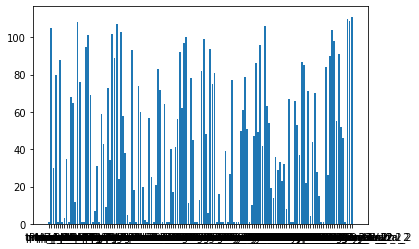

In [42]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot


rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=30)
fit = rfe.fit(features_dataset_marcos, target_df.PMDA)
# report selected features
print('Selected Features:')
names = features_dataset_marcos.columns.values
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])
# plot feature rank
names = features_dataset_marcos.columns.values
ticks = [i for i in range(len(names))]

pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

In [43]:
selected_feature = names[fit.support_]

In [44]:
date_time = dataset_marcos_fechas.index

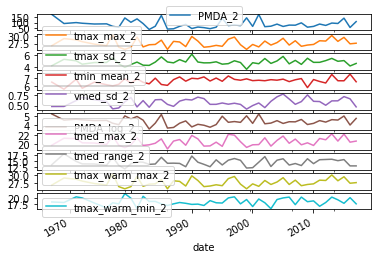

In [45]:
plot_cols = selected_feature[0:10]
plot_features = dataset_marcos_fechas[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)



In [51]:
from pca import pca
from sklearn.preprocessing import StandardScaler



In [52]:
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(features_dataset_marcos)
scaled_dataset = pd.DataFrame(scaled_dataset, columns = features_dataset_marcos.columns.to_list())

# Initialize
model = pca(n_components = .9)
# Fit transform
out = model.fit_transform(scaled_dataset)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [140] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [17] that covers the [90.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [53]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

       PC                   feature   loading  type
0     PC1    tmax_warm_normalized_2  0.145432  best
1     PC2           Nino_3_4_mean_2 -0.163343  best
2     PC3                 prcp_sd_2 -0.163924  best
3     PC4  vmed_warm_standardized_2 -0.242284  best
4     PC5         tmed_warm_range_2 -0.215560  best
5     PC6                 tmin_sd_2  0.239213  best
6     PC7              Palmer_sum_2 -0.220793  best
7     PC8           tmin_warm_min_2 -0.260381  best
8     PC9               Palmer_sd_2  0.292375  best
9    PC10                 PDO_min_2  0.251612  best
10   PC11   type_category_Neutral_2  0.342590  best
11   PC12           Radiacion_mad_2  0.309227  best
12   PC13   type_category_Neutral_2  0.272804  best
13   PC14            vmed_warm_sd_2 -0.235354  best
14   PC15                  PMDA_7_2 -0.343307  best
15   PC16                 PMDA_10_2  0.382012  best
16   PC17                  PMDA_8_2  0.312340  best
17   PC18                 PMDA_12_2  0.307105  best
18   PC19   

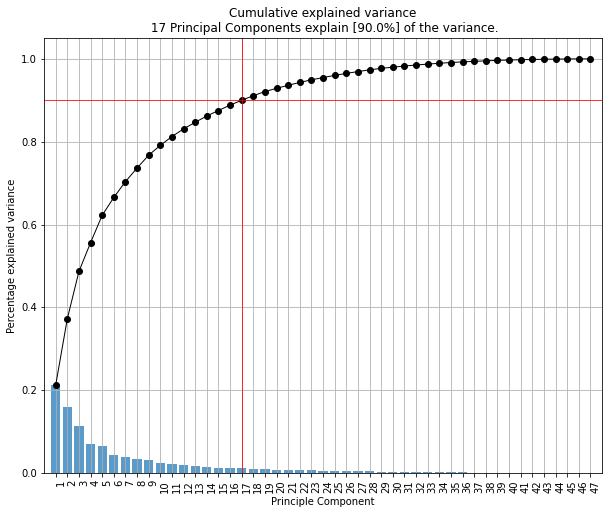

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9bc1d85290>)

<Figure size 432x288 with 0 Axes>

In [54]:
model.plot()

## Modelos todas las features

#### Regresión simple

In [57]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


In [58]:
X = dataset_marcos.copy()
y = dataset_marcos.PMDA

X_train = X[dataset_marcos.hydro_year < 2000].drop(['PMDA', 'omm_id'], axis = 1)
X_train = X_train
y_train = dataset_marcos[dataset_marcos.hydro_year < 2000].PMDA

X_test = X[dataset_marcos.hydro_year > 2000].drop(['PMDA', 'omm_id'], axis = 1)
X_test = X_test
y_test = dataset_marcos[dataset_marcos.hydro_year > 2000].PMDA

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
fitted_model = model.fit(X_train, y_train)

In [60]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_train_pred = fitted_model.predict(X_train)
y_test_pred = fitted_model.predict(X_test)

mae_tr = mean_absolute_error(y_train, y_train_pred)
mae_ts = mean_absolute_error(y_test, y_test_pred)

print(f'MAE: Train error: {mae_tr}')
print(f'MAE: Test error: {mae_ts}', '\n')

r2_tr = r2_score(y_train, y_train_pred)
r2_ts = r2_score(y_test, y_test_pred)

print(f'R2: Train error: {r2_tr}')
print(f'R2: Test error: {r2_ts}', '\n')

median_abs_error_tr = median_absolute_error(y_train, y_train_pred)
median_abs_error_ts = median_absolute_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {median_abs_error_tr}')
print(f'Median Absolute Error: Test error: {median_abs_error_ts}', '\n')

mean_sq_error_tr = mean_squared_error(y_train, y_train_pred)
mean_sq_error_ts = mean_squared_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {mean_sq_error_tr}')
print(f'Median Absolute Error: Test error: {mean_sq_error_ts}', '\n')

MAE: Train error: 2.0409727547867706e-13
MAE: Test error: 24.8010465119462 

R2: Train error: 1.0
R2: Test error: -0.6639294730834622 

Median Absolute Error: Train error: 1.4210854715202004e-13
Median Absolute Error: Test error: 25.68112500298838 

Median Absolute Error: Train error: 7.452766122285527e-26
Median Absolute Error: Test error: 835.2494139271779 



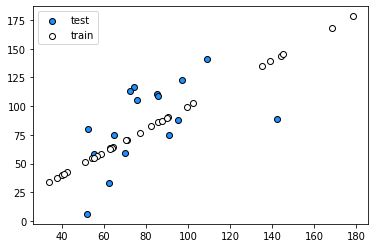

In [61]:
plt.scatter(y_test, y_test_pred, facecolor="dodgerblue", edgecolor="k", label="test")
plt.scatter(y_train, y_train_pred, facecolor="white", edgecolor="k", label="train")
#plt.plot(y, fitted_model.predict(X), color = 'red') 
#plt.plot(y_train, y_train_pred, color="tomato", label="modelo")
#plt.title(feature)
plt.legend()
plt.show()

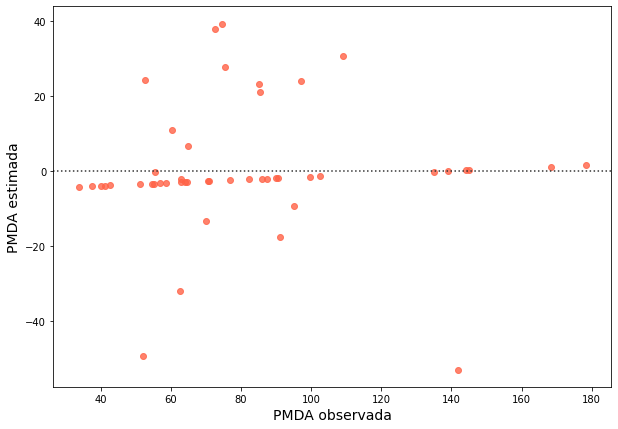

In [62]:
import seaborn as sns

df_prediction = {'y': y, 'y_pred': fitted_model.predict(X.drop(['PMDA', 'omm_id'], axis = 1))}
df_prediction = pd.DataFrame(data=df_prediction)

fig = plt.figure(figsize = (10, 7))
sns.residplot(df_prediction.y, df_prediction.y_pred, color='tomato')

# title and labels
plt.xlabel('PMDA observada', size=14)
plt.ylabel('PMDA estimada', size=14);

### Modelos con features seleccionadas

In [63]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

In [64]:
#pd.plotting.scatter_matrix(dataset_marcos[['PMDA'] +  selected_feature], alpha=0.2, figsize  = [15, 15])

In [65]:
selected_feature

array(['PMDA_2', 'tmax_max_2', 'tmax_sd_2', 'tmin_mean_2', 'vmed_sd_2',
       'PMDA_log_2', 'tmed_max_2', 'tmed_range_2', 'tmax_warm_max_2',
       'tmax_warm_min_2', 'vmed_warm_max_2', 'vmed_warm_sd_2',
       'tmed_warm_max_2', 'tmed_warm_min_2', 'tmed_warm_range_2',
       'ETreal_min_2', 'ETreal_sd_2', 'Radiacion_max_2',
       'Radiacion_min_2', 'Radiacion_sd_2', 'Radiacion_sum_2',
       'Presion_min_2', 'Presion_sd_2', 'Presion_mad_2', 'Palmer_sd_2',
       'PMDA_11_2', 'PMDA_12_2', 'SOI_OND_mean_2', 'SOI_OND_max_2',
       'PDO_OND_min_2'], dtype=object)

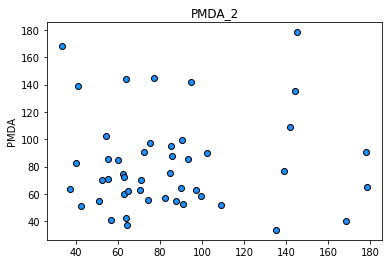

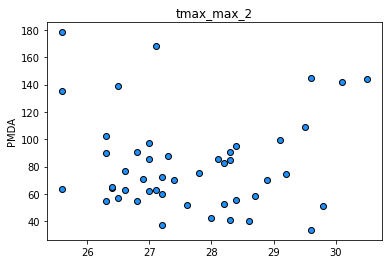

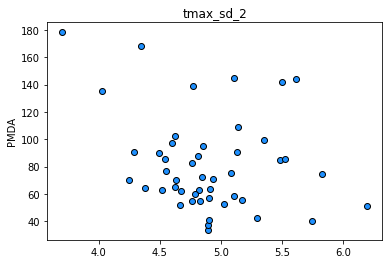

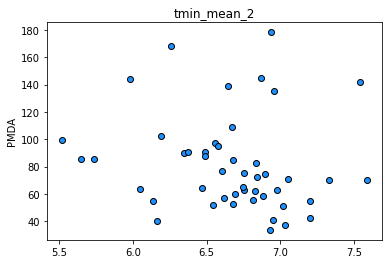

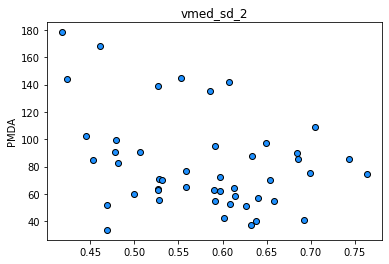

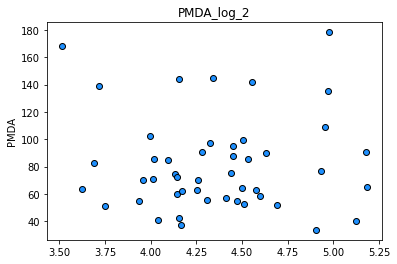

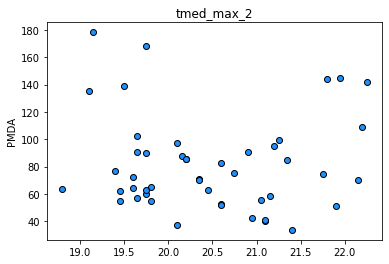

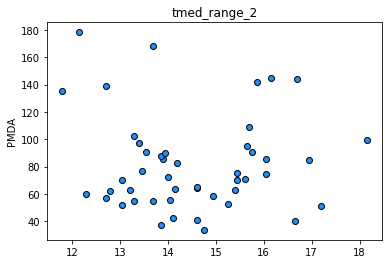

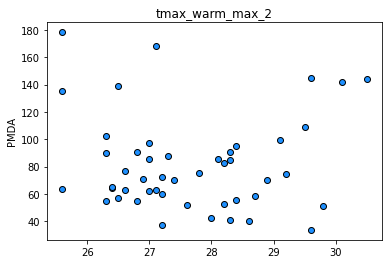

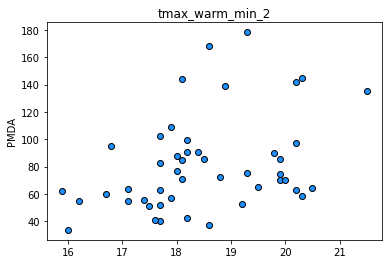

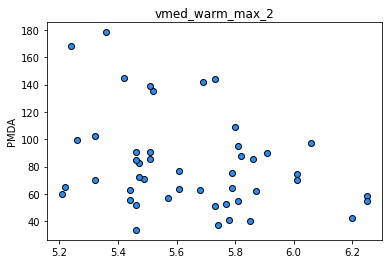

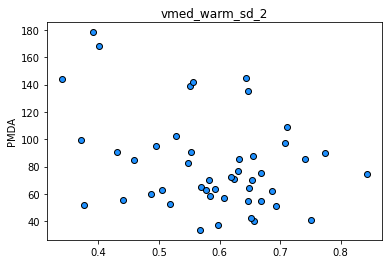

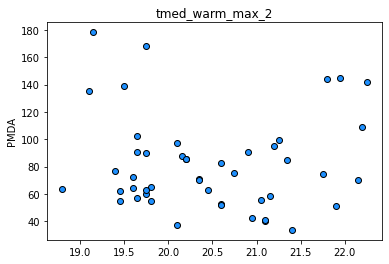

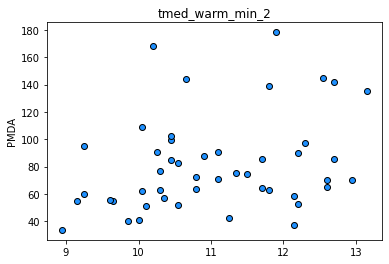

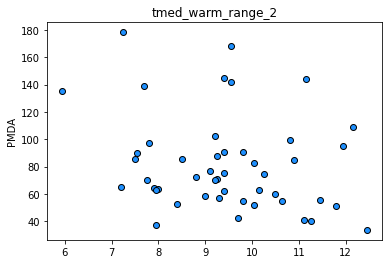

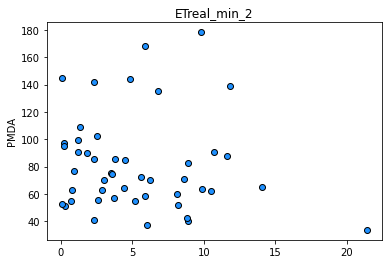

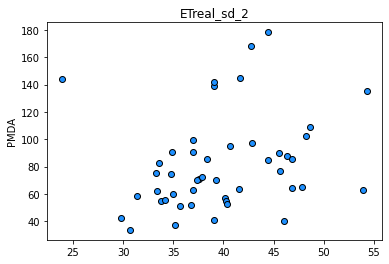

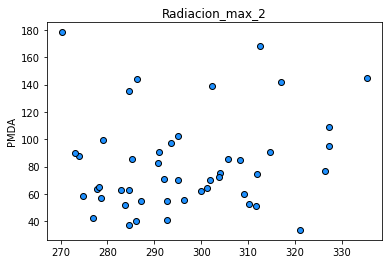

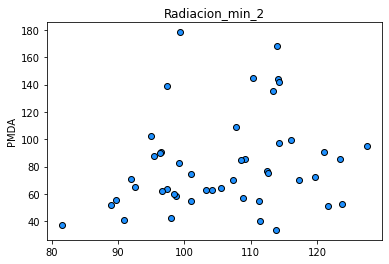

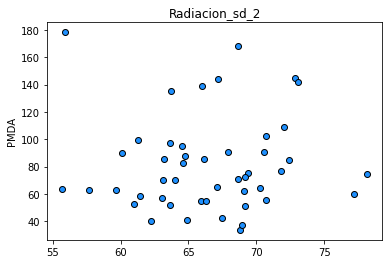

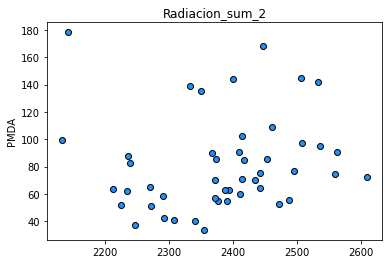

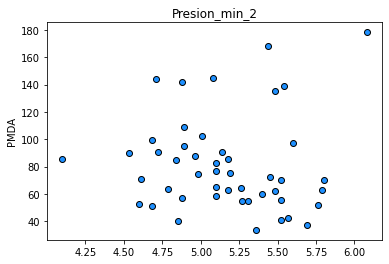

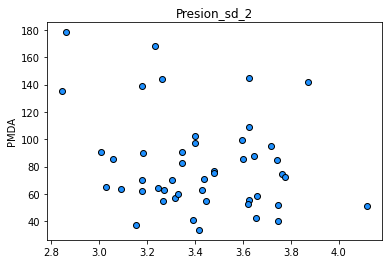

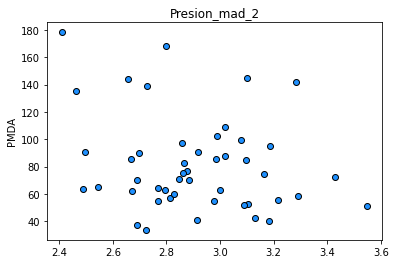

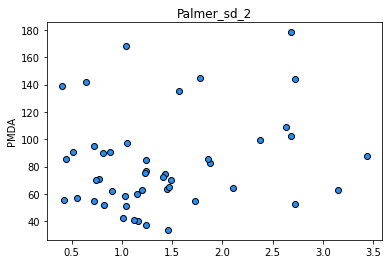

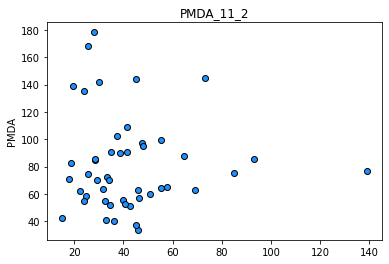

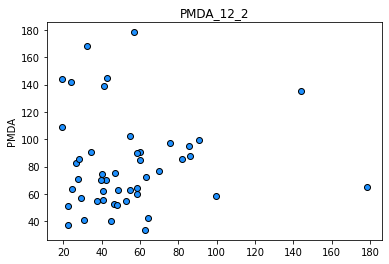

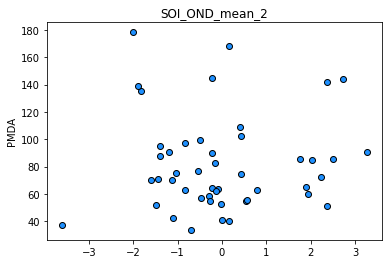

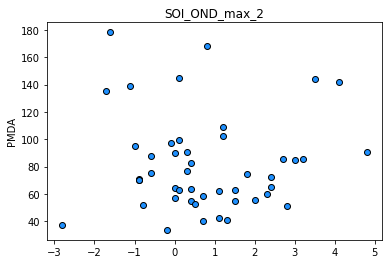

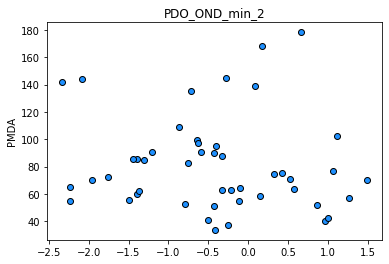

In [66]:
# Comente la parte de subplot porque no nos mostraba
# todos los gráficos

# fig = plt.figure(figsize=(30,20))
# fig.subplots_adjust(hspace=0.5, wspace=0.5)
# i = 1
for feature in selected_feature:
#      ax = fig.add_subplot(3, 5, i)
    plt.scatter(dataset_marcos.loc[:, feature], dataset_marcos['PMDA'], facecolor='dodgerblue', edgecolor='k', label='datos')
    plt.title(feature)
    plt.ylabel('PMDA')
#     i += 1
    plt.show()

In [67]:
X = dataset_marcos_fechas.copy()
y = dataset_marcos_fechas.PMDA

X_train = X[dataset_marcos_fechas.hydro_year < 1995].drop(['PMDA', 'omm_id'], axis = 1)
X_train = X_train[selected_feature] # selected_feature
y_train = dataset_marcos_fechas[dataset_marcos_fechas.hydro_year < 1995].PMDA

X_test = X[dataset_marcos_fechas.hydro_year > 1995].drop(['PMDA', 'omm_id'], axis = 1)
X_test = X_test[selected_feature]
y_test = dataset_marcos_fechas[dataset_marcos_fechas.hydro_year > 1995].PMDA

In [68]:
X_train.shape

(24, 30)

In [69]:
X_train.head()

,PMDA_2,tmax_max_2,tmax_sd_2,tmin_mean_2,vmed_sd_2,PMDA_log_2,tmed_max_2,tmed_range_2,tmax_warm_max_2,tmax_warm_min_2,vmed_warm_max_2,vmed_warm_sd_2,tmed_warm_max_2,tmed_warm_min_2,tmed_warm_range_2,ETreal_min_2,ETreal_sd_2,Radiacion_max_2,Radiacion_min_2,Radiacion_sd_2,Radiacion_sum_2,Presion_min_2,Presion_sd_2,Presion_mad_2,Palmer_sd_2,PMDA_11_2,PMDA_12_2,SOI_OND_mean_2,SOI_OND_max_2,PDO_OND_min_2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1967-01-15,178.0,26.8,4.290662,6.491781,0.478148,5.181784,19.65,13.55,26.8,18.4,5.46,0.431170,19.65,10.25,9.40,10.7,34.896170,291.1,96.4,70.552218,2409.0,5.14,3.007131,2.497500,0.879219,41.5,60.0,-1.2,0.3,-0.59
1969-01-15,90.5,29.1,5.351934,5.523294,0.479450,4.505350,21.25,18.15,29.1,18.2,5.26,0.371350,21.25,10.45,10.80,1.2,37.001039,279.0,116.1,61.254140,2133.1,4.68,3.597110,3.077025,2.376157,55.2,90.5,-0.5,0.1,-0.64
1971-01-15,99.6,28.7,5.102221,6.885479,0.613920,4.601162,21.15,14.95,28.7,20.3,6.25,0.583765,21.15,12.15,9.00,5.9,31.344434,274.8,98.7,61.431669,2290.1,5.10,3.658103,3.290833,1.032908,24.8,99.6,-0.3,0.7,0.15
1972-01-15,93.2,28.1,4.541122,5.652329,0.685168,4.534748,20.20,13.90,28.1,19.9,5.86,0.631728,20.20,12.70,7.50,2.3,38.333924,285.2,109.1,66.139895,2373.3,5.18,3.058940,2.667222,0.442934,93.2,82.0,2.5,3.2,-1.39
1974-01-15,85.9,27.3,4.814362,6.491233,0.633144,4.453184,20.15,13.85,27.3,18.0,5.82,0.655435,20.15,10.90,9.25,11.6,46.341927,273.9,95.4,64.760159,2235.6,4.96,3.645925,3.019167,3.437735,64.8,85.9,-1.4,-0.6,-0.33


In [78]:
y_train.shape

(24,)

In [79]:
X_test.shape

(22, 30)

In [80]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [81]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [82]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score



In [83]:
from sklearn.preprocessing import StandardScaler, Normalizer

norm = Normalizer()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_sc = sc.transform(X[selected_feature])

LR: -0.668127 (0.989703)
NN: -0.558070 (0.473401)
KNN: -0.071874 (0.142324)
RF: 0.025031 (0.123234)
SVR: -0.120151 (0.062638)
DT: -0.298471 (0.519236)
XGB: -0.106864 (0.136331)


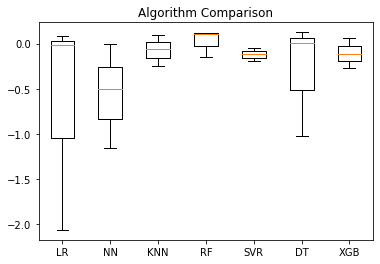

In [85]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
models.append(('DT', DecisionTreeRegressor(max_depth = 5))) # Decision Tree
models.append(('XGB', XGBRegressor()))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits = 3)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [93]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_search)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()

#param_search = { 
#    'n_estimators': [20, 50, 100],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [i for i in range(5,15)]
#}

tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, 
                       scoring = rmse_score, n_jobs = -1, verbose=2)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.1min


In [90]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.0018
mean_squared_log_error:  0.1148
r2:  0.0014
MAE:  24.9495
MSE:  1031.1912
RMSE:  32.1122


In [91]:
PMDA_resultados = pd.DataFrame(y)
PMDA_resultados['PMDA_pred'] = best_model.predict(X_sc) # selected_feature  features_columns
PMDA_resultados.head()

,PMDA,PMDA_pred
date,,
1967-01-15,90.5,87.04510
1969-01-15,99.6,87.04510
1971-01-15,58.5,82.56025
1972-01-15,85.9,91.28130
1974-01-15,87.5,88.13735


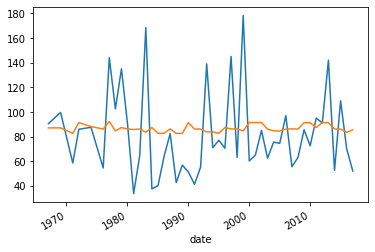

In [92]:
PMDA_resultados.PMDA.plot()
PMDA_resultados.PMDA_pred.plot()

### Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
fitted_model = model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_train_pred = fitted_model.predict(X_train)
y_test_pred = fitted_model.predict(X_test)

mse_tr = mean_squared_error(y_train, y_train_pred)
mse_ts = mean_squared_error(y_test, y_test_pred)

print(f'MSE: Train error: {mse_tr}')
print(f'MSE: Test error: {mse_ts}', '\n')

mae_tr = mean_absolute_error(y_train, y_train_pred)
mae_ts = mean_absolute_error(y_test, y_test_pred)

print(f'MAE: Train error: {mae_tr}')
print(f'MAE: Test error: {mae_ts}', '\n')

r2_tr = r2_score(y_train, y_train_pred)
r2_ts = r2_score(y_test, y_test_pred)

print(f'R2: Train error: {r2_tr}')
print(f'R2: Test error: {r2_ts}', '\n')

median_abs_error_tr = median_absolute_error(y_train, y_train_pred)
median_abs_error_ts = median_absolute_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {median_abs_error_tr}')
print(f'Median Absolute Error: Test error: {median_abs_error_ts}', '\n')

mean_sq_error_tr = mean_squared_error(y_train, y_train_pred)
mean_sq_error_ts = mean_squared_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {mean_sq_error_tr}')
print(f'Median Absolute Error: Test error: {mean_sq_error_ts}', '\n')

In [ ]:


plt.scatter(y_test, y_test_pred, facecolor="dodgerblue", edgecolor="k", label="test")
plt.scatter(y_train, y_train_pred, facecolor="white", edgecolor="k", label="train")
#plt.plot(y, fitted_model.predict(X), color = 'red') 
#plt.plot(y_train, y_train_pred, color="tomato", label="modelo")
#plt.title(feature)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

df_prediction = {'y': y, 'y_pred': fitted_model.predict(X[selected_feature])}
df_prediction = pd.DataFrame(data=df_prediction)

fig = plt.figure(figsize = (10, 7))
sns.residplot(df_prediction.y, df_prediction.y_pred, color='tomato')

# title and labels
plt.xlabel('PMDA observada', size=14)
plt.ylabel('PMDA estimada', size=14);

### Random Forest

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

mse_tr = mean_squared_error(y_train, y_train_pred)
mse_ts = mean_squared_error(y_test, y_test_pred)

print(f'MSE: Train error: {mse_tr}')
print(f'MSE: Test error: {mse_ts}', '\n')

mae_tr = mean_absolute_error(y_train, y_train_pred)
mae_ts = mean_absolute_error(y_test, y_test_pred)

print(f'MAE: Train error: {mae_tr}')
print(f'MAE: Test error: {mae_ts}', '\n')

r2_tr = r2_score(y_train, y_train_pred)
r2_ts = r2_score(y_test, y_test_pred)

print(f'R2: Train error: {r2_tr}')
print(f'R2: Test error: {r2_ts}', '\n')

median_abs_error_tr = median_absolute_error(y_train, y_train_pred)
median_abs_error_ts = median_absolute_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {median_abs_error_tr}')
print(f'Median Absolute Error: Test error: {median_abs_error_ts}', '\n')

mean_sq_error_tr = mean_squared_error(y_train, y_train_pred)
mean_sq_error_ts = mean_squared_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {mean_sq_error_tr}')
print(f'Median Absolute Error: Test error: {mean_sq_error_ts}', '\n')

#### Hyperparameters tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train, y_train)


In [ ]:
# Predict
y_train_pred = regr_1.predict(X_train)
y_test_pred = regr_1.predict(X_test)
#y_2 = regr_2.predict(X_test)

mse_tr = mean_squared_error(y_train, y_train_pred)
mse_ts = mean_squared_error(y_test, y_test_pred)

print(f'MSE: Train error: {mse_tr}')
print(f'MSE: Test error: {mse_ts}', '\n')

mae_tr = mean_absolute_error(y_train, y_train_pred)
mae_ts = mean_absolute_error(y_test, y_test_pred)

print(f'MAE: Train error: {mae_tr}')
print(f'MAE: Test error: {mae_ts}', '\n')

r2_tr = r2_score(y_train, y_train_pred)
r2_ts = r2_score(y_test, y_test_pred)

print(f'R2: Train error: {r2_tr}')
print(f'R2: Test error: {r2_ts}', '\n')

median_abs_error_tr = median_absolute_error(y_train, y_train_pred)
median_abs_error_ts = median_absolute_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {median_abs_error_tr}')
print(f'Median Absolute Error: Test error: {median_abs_error_ts}', '\n')

mean_sq_error_tr = mean_squared_error(y_train, y_train_pred)
mean_sq_error_ts = mean_squared_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {mean_sq_error_tr}')
print(f'Median Absolute Error: Test error: {mean_sq_error_ts}', '\n')

#### Hyperparameters tuning

In [ ]:
dtr = DecisionTreeRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(str.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = list(range(1,X_train.shape[1]))
# Maximum number of levels in tree
max_depths = np.linspace(1, 32, 32, endpoint=True)
# Minimum number of samples required to split a node
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
# Minimum number of samples required at each leaf node
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, 
                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(X_train, y_train)

In [ ]:
dtr_random.best_params_


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = DecisionTreeRegressor(random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = dtr_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Create a based model
dtr = DecisionTreeRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, 
                          cv = 3, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

## XGBoost

In [ ]:
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict

In [ ]:
X = dataset_marcos.copy()
y = dataset_marcos.PMDA

X_train = X[X.hydro_year < 2005].drop(['PMDA', 'omm_id'], axis = 1)
X_train = X_train[selected_feature]
y_train = X[X.hydro_year < 2005].PMDA

X_test = X[X.hydro_year > 2005].drop(['PMDA', 'omm_id'], axis = 1)
X_test = X_test[selected_feature]
y_test = X[X.hydro_year > 2005].PMDA

In [ ]:
X_train.head()

In [ ]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [ ]:
#every_column_except_y= [col for col in train_dataset.columns if col not in ['SalePrice','Id']]
#model.fit(X_train, y_train)

#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}



In [ ]:
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs = -1, iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)


In [ ]:
#gsearch1.
#print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

In [ ]:

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha= 1e-05,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)

In [ ]:
# Predict
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

mse_tr = mean_squared_error(y_train, y_train_pred)
mse_ts = mean_squared_error(y_test, y_test_pred)

print(f'MSE: Train error: {mse_tr}')
print(f'MSE: Test error: {mse_ts}', '\n')

mae_tr = mean_absolute_error(y_train, y_train_pred)
mae_ts = mean_absolute_error(y_test, y_test_pred)

print(f'MAE: Train error: {mae_tr}')
print(f'MAE: Test error: {mae_ts}', '\n')

r2_tr = r2_score(y_train, y_train_pred)
r2_ts = r2_score(y_test, y_test_pred)

print(f'R2: Train error: {r2_tr}')
print(f'R2: Test error: {r2_ts}', '\n')

median_abs_error_tr = median_absolute_error(y_train, y_train_pred)
median_abs_error_ts = median_absolute_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {median_abs_error_tr}')
print(f'Median Absolute Error: Test error: {median_abs_error_ts}', '\n')

mean_sq_error_tr = mean_squared_error(y_train, y_train_pred)
mean_sq_error_ts = mean_squared_error(y_test, y_test_pred)

print(f'Median Absolute Error: Train error: {mean_sq_error_tr}')
print(f'Median Absolute Error: Test error: {mean_sq_error_ts}', '\n')

In [ ]:
from pygam import GAM, s, f
from pygam.datasets import wage


## model
gam = GAM(s(0),distribution='gamma', link='inverse').fit(X_train['SOI_mean_2'], y_train)
gam.summary()
gam.gridsearch(X_train, y_train)

In [ ]:
XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')

#plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval');